Jonathan Hyatt

This notebook loads in data from Liquidity Database and creates figures

Load in the data and create the dataframes for future analysis

In [1]:
# This file collects data from the database, turns it into a df, and runs analysis on it.
from statistics_functions import * #extract_from_liquidity, sort_and_select, graph_dist_seperate, graph_dist_together
from extract import extract
from datetime import datetime, timedelta

db_name = 'liquidity'

start_time = datetime(2024, 6, 20, 0, 0, 0)
end_time = datetime(2024, 6, 21, 0, 0, 0)

times = [{'start_time': datetime(2024,6,20,0,0,0), 'end_time':datetime(2024,6,21,0,0,0)},
         {'start_time': datetime(2024,6,1,0,0,0), 'end_time':datetime(2024,6,3,21,0,0)},
         {'start_time': datetime(2024,9,24,22,0,0), 'end_time':datetime(2024,9,25,22,0,0)},
         {'start_time': datetime(2024,9,26,22,0,0), 'end_time':datetime(2024,9,27,18,0,0)},
         {'start_time': datetime(2024,10,17,8,0,0), 'end_time':datetime(2024,10,17,18,0,0)}] #The last one has a price change in it


Create all the data we need

In [2]:
num_obs = None
# Get the obs_df
print('Extracting from the db')
obs_df = extract_from_liquidity(db_name,num_obs,start_time,end_time)
# Here we use the df to run the analysis using the df.describe() method

grouped_df = obs_df.groupby('exchange')
ordered_df = obs_df.sort_values(by='exchange')

desc_df = grouped_df.describe(include='all')
desc_df_selected = desc_df.drop('time',axis=1)

# These are the exchanges we are analyzing
to_keep = ['coinbase','gemini','kraken','binanceUs'] # binanceUS
# These are the columns we care about graphing
columns = ['midpoint','spread','price_impact_ask','price_impact_bid']
# Create the dataframes
grouped_df = pd.DataFrame(grouped_df)
filtered_df = grouped_df[grouped_df[0].isin(to_keep)].reset_index()

# Create a dictionary to store DataFrames
print('Creating the dfs')
df_dict = {}
df_list = []
dfs_dict = {}
# Loop through unique exchange names
for exchange in filtered_df[0].unique():
    # Filter the DataFrame for the current exchange
    exchange_df = filtered_df[filtered_df[0] == exchange]
    
    # Add the DataFrame to the dictionary with the exchange name as the key
    df_dict[f'{exchange}_df'] = exchange_df.iloc[0].values[2:][0]

# Now create individual DataFrames for each entry in the dictionary
for key, df in df_dict.items():
    # Dynamically assign DataFrame to a variable if needed
    globals()[key] = df  # Caution: This creates a global variable
    dfs_dict[key] = df
    df_list.append(key)


descriptive_dfs = {'Binance':binanceUs_df,'Coinbase':coinbase_df, 'Gemini':gemini_df,'Kraken':kraken_df}

Extracting from the db
Creating the dfs


In [3]:
binanceUs_df

time   exchange  midpoint  spread  price_impact_bid  \
9764  2024-06-20 00:00:00  binanceUs   65522.5   73.84              0.33   
9765  2024-06-20 00:00:05  binanceUs   65523.1   72.58              1.55   
9766  2024-06-20 00:00:10  binanceUs   65527.3   64.09              9.97   
9767  2024-06-20 00:00:15  binanceUs   65530.2   58.26              5.44   
9768  2024-06-20 00:00:20  binanceUs   65539.7   71.78              4.95   
...                   ...        ...       ...     ...               ...   
19523 2024-06-20 13:33:18  binanceUs   65036.9   59.61             19.55   
19524 2024-06-20 13:33:23  binanceUs   65047.1   46.73             36.28   
19525 2024-06-20 13:33:28  binanceUs   65049.1   42.80              6.06   
19526 2024-06-20 13:33:33  binanceUs   65049.1   42.80             16.33   
19527 2024-06-20 13:33:38  binanceUs   65040.7   40.09              6.07   

       price_impact_ask  price_impact_bid_quantity  price_impact_ask_quantity  
9764              72.68                        1.0                        1.0  
9765              72.72                        1.0                        1.0  
9766              72.78                        1.0                        1.0  
9767              72.80                        1.0                        1.0  
9768              56.47                        1.0                        1.0  
...                 ...                        ...                        ...  
19523             35.97                        1.0                        1.0  
19524             32.15                        1.0                        1.0  
19525             32.15                        1.0                        1.0  
19526             32.15                        1.0                        1.0  
19527             41.87                        1.0                        1.0  

[9764 rows x 8 columns]

In [4]:
for name, df in descriptive_dfs.items():
    print(name)
    df = df[['price_impact_bid','price_impact_ask','spread']]
    df_described = df.describe(include='all').loc[['mean','std','min','max']]
    df_described = df_described.round(2)
    display(df_described)

Binance


price_impact_bid  price_impact_ask  spread
mean             17.18             61.93   52.08
std              32.63             52.86   19.67
min               0.00              0.00    0.01
max             402.22            826.67  250.83

Coinbase


price_impact_bid  price_impact_ask  spread
mean              7.81              5.94    1.44
std               3.21              3.65    2.01
min               0.00              0.00    0.01
max              27.37             20.06   12.83

Gemini


price_impact_bid  price_impact_ask  spread
mean             16.47             13.41    6.39
std              11.03              6.76    7.08
min               0.00              0.00    0.01
max             244.04            113.57   91.89

Kraken


price_impact_bid  price_impact_ask  spread
mean              8.40              5.42    0.11
std              14.17             11.12    0.19
min               0.00              0.00    0.10
max              70.70             71.80   10.00

In [5]:
from pprint import pprint
for name, df in descriptive_dfs.items():
    print(f"\n{name}")
    df = df[['price_impact_bid','price_impact_ask','spread']]
    df_described = df.describe(include='all').loc[['mean','std','min','max']]
    df_rounded = df_described.round(2)  # Round to 2 decimal places
    
    # Rename index to match the desired output
    df_rounded.index = ['Mean', 'Std', 'Min', 'Max']
    
    # Prepare the LaTeX table string
    latex_table = (
        "\\begin{center}\n"
        "\\begin{table}[ht]\n"
        "    \\centering\n"
        "    \\begin{tabular}{c c c c}\n"
        "    \\toprule\n"
        "     & Price Impact (Bid) & Price Impact (Ask) & Spread \\\\\n"
        "     \\midrule\n"
    )
    
    # Add rows for Mean, Std, Min, Max
    for index, row in df_rounded.iterrows():
        latex_table += f"    {index} & {row['price_impact_bid']:.2f} & {row['price_impact_ask']:.2f} & {row['spread']:.2f} \\\\\n"
    
    # Close the table with the specific caption
    latex_table += (
        "    \\bottomrule\n"
        "    \\end{tabular}\n"
        "    \\caption{"
        f"{name}"
        " 6/20/24 - 6/21/24}\n"
        "    \\label{tab:my_label}\n"
        "\\end{table}\n"
        "\\end{center}"
    )
    
    print(latex_table)


Binance
\begin{center}
\begin{table}[ht]
    \centering
    \begin{tabular}{c c c c}
    \toprule
     & Price Impact (Bid) & Price Impact (Ask) & Spread \\
     \midrule
    Mean & 17.18 & 61.93 & 52.08 \\
    Std & 32.63 & 52.86 & 19.67 \\
    Min & 0.00 & 0.00 & 0.01 \\
    Max & 402.22 & 826.67 & 250.83 \\
    \bottomrule
    \end{tabular}
    \caption{Binance 6/20/24 - 6/21/24}
    \label{tab:my_label}
\end{table}
\end{center}

Coinbase
\begin{center}
\begin{table}[ht]
    \centering
    \begin{tabular}{c c c c}
    \toprule
     & Price Impact (Bid) & Price Impact (Ask) & Spread \\
     \midrule
    Mean & 7.81 & 5.94 & 1.44 \\
    Std & 3.21 & 3.65 & 2.01 \\
    Min & 0.00 & 0.00 & 0.01 \\
    Max & 27.37 & 20.06 & 12.83 \\
    \bottomrule
    \end{tabular}
    \caption{Coinbase 6/20/24 - 6/21/24}
    \label{tab:my_label}
\end{table}
\end{center}

Gemini
\begin{center}
\begin{table}[ht]
    \centering
    \begin{tabular}{c c c c}
    \toprule
     & Price Impact (Bid) & Price I

Extracting data from the database for start_time: 2024-06-20 00:00:00 to end_time: 2024-06-21 00:00:00


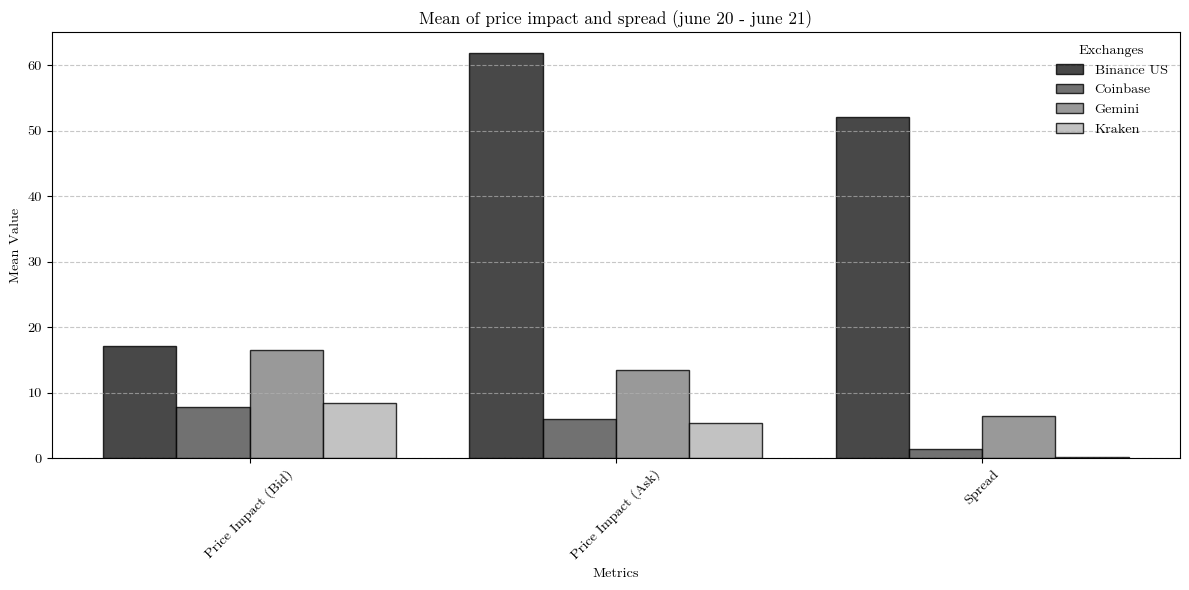

Analysis complete for start_time: 2024-06-20 00:00:00, end_time: 2024-06-21 00:00:00
Extracting data from the database for start_time: 2024-06-01 00:00:00 to end_time: 2024-06-03 21:00:00


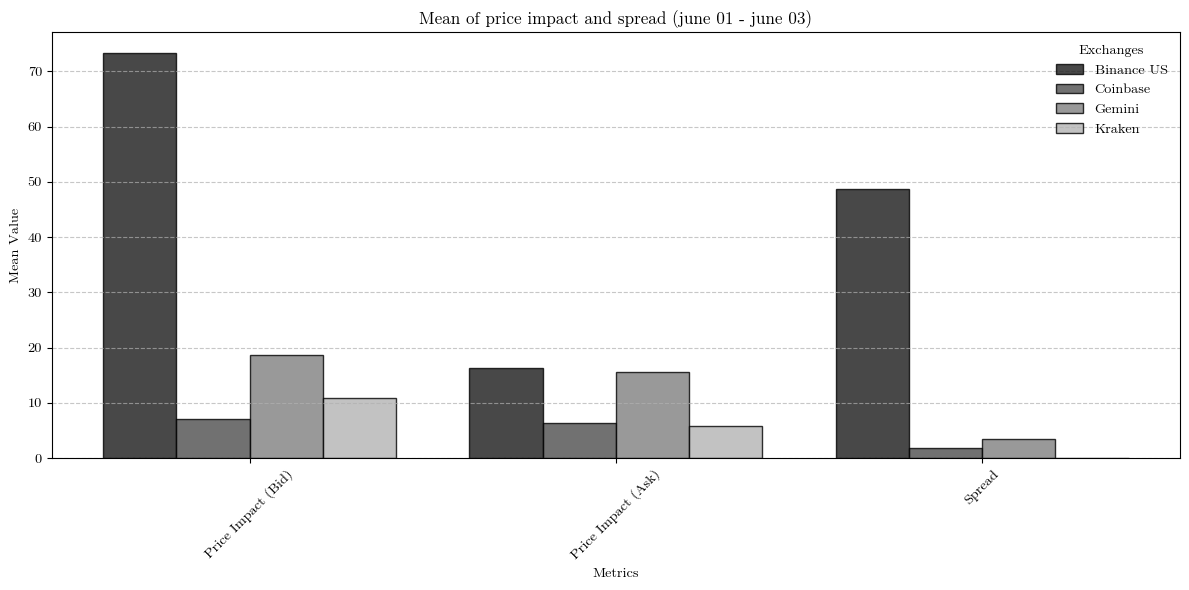

Analysis complete for start_time: 2024-06-01 00:00:00, end_time: 2024-06-03 21:00:00
Extracting data from the database for start_time: 2024-09-24 22:00:00 to end_time: 2024-09-25 22:00:00


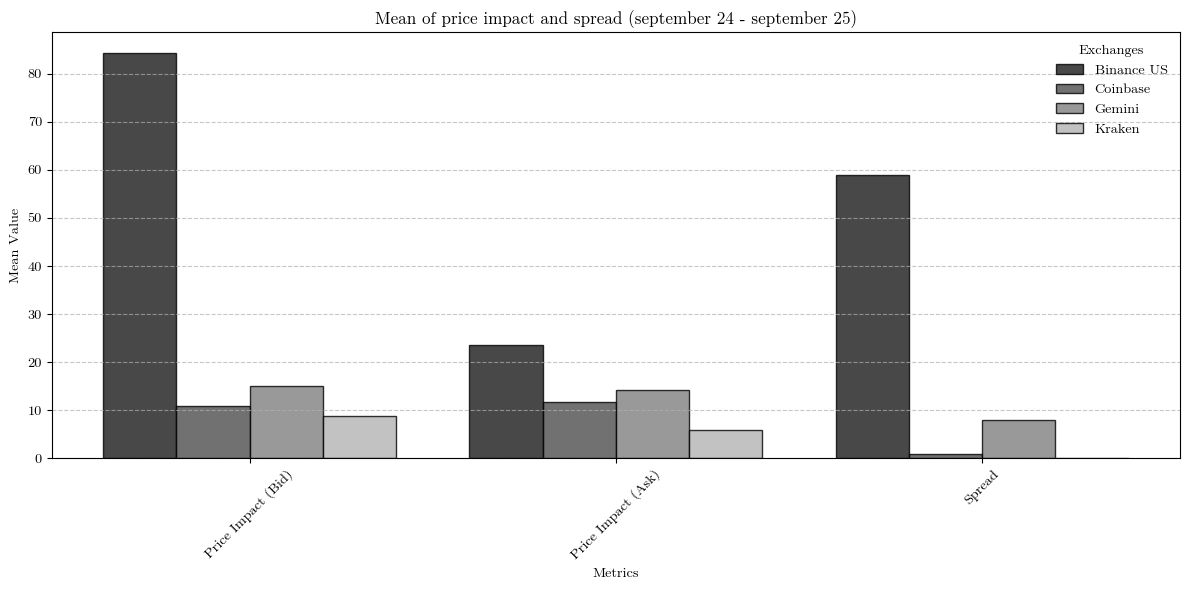

Analysis complete for start_time: 2024-09-24 22:00:00, end_time: 2024-09-25 22:00:00
Extracting data from the database for start_time: 2024-09-26 22:00:00 to end_time: 2024-09-27 18:00:00


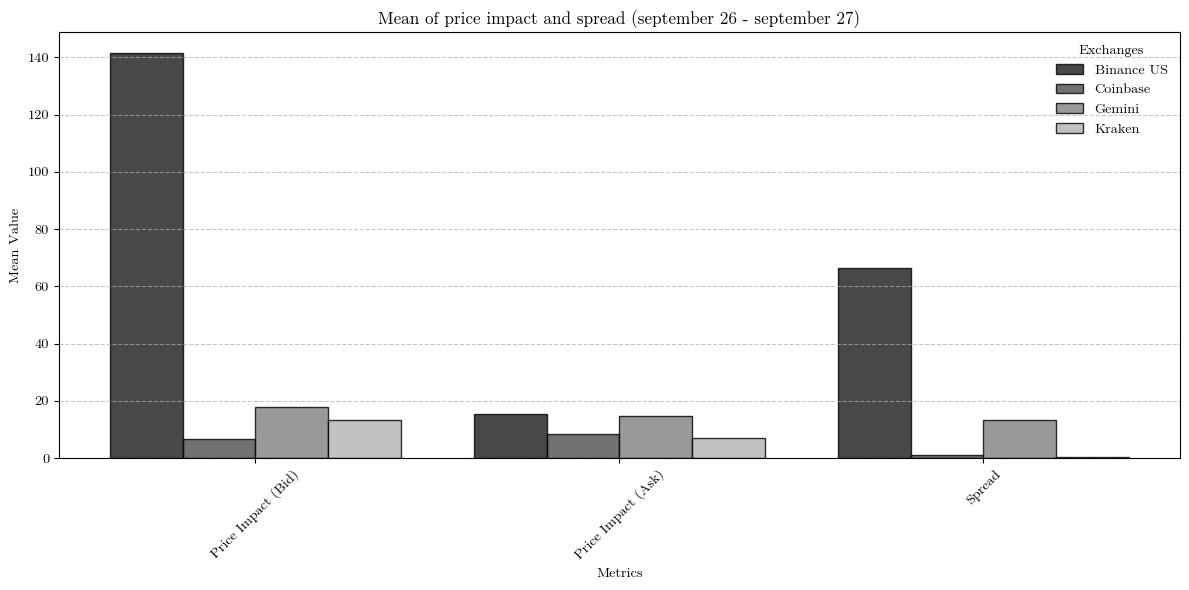

Analysis complete for start_time: 2024-09-26 22:00:00, end_time: 2024-09-27 18:00:00
Extracting data from the database for start_time: 2024-10-17 08:00:00 to end_time: 2024-10-17 18:00:00


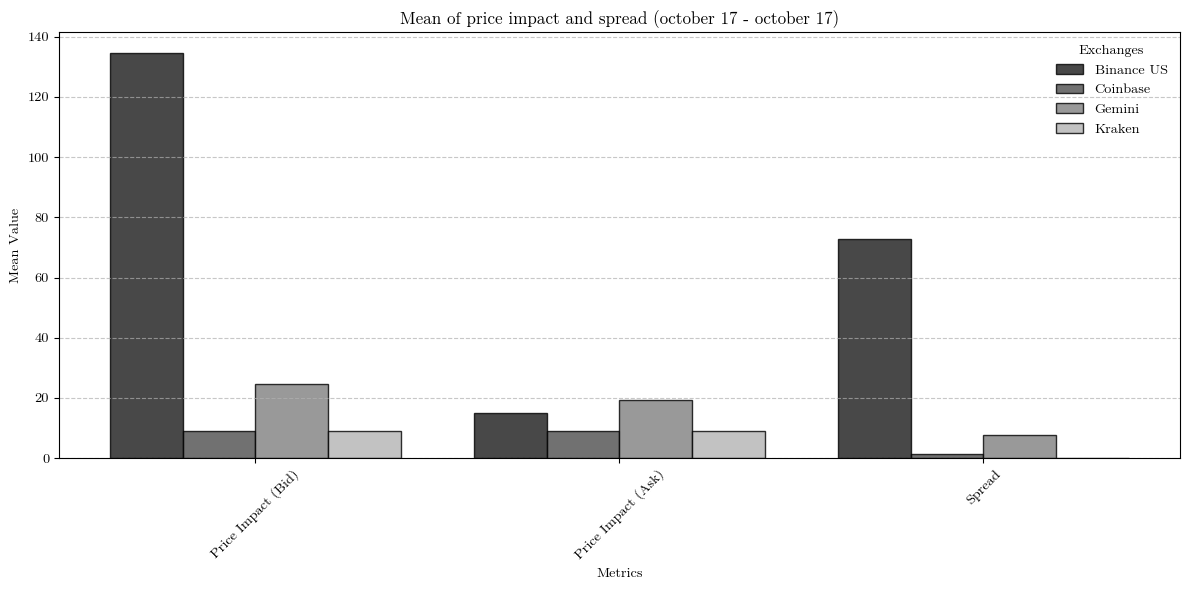

Analysis complete for start_time: 2024-10-17 08:00:00, end_time: 2024-10-17 18:00:00


In [6]:
to_keep = ['binanceUs','coinbase', 'gemini', 'kraken']  # Exchanges to analyze

for time in times:
    analyze_and_plot_liquidity_bw(
        db_name=db_name,
        num_obs=None,  # Adjust as needed
        start_time=time['start_time'],
        end_time=time['end_time'],
        to_keep=to_keep,
        columns=['price_impact_bid', 'price_impact_ask', 'spread']
    )

Extracting data from the database for start_time: 2024-06-20 00:00:00 to end_time: 2024-06-21 00:00:00


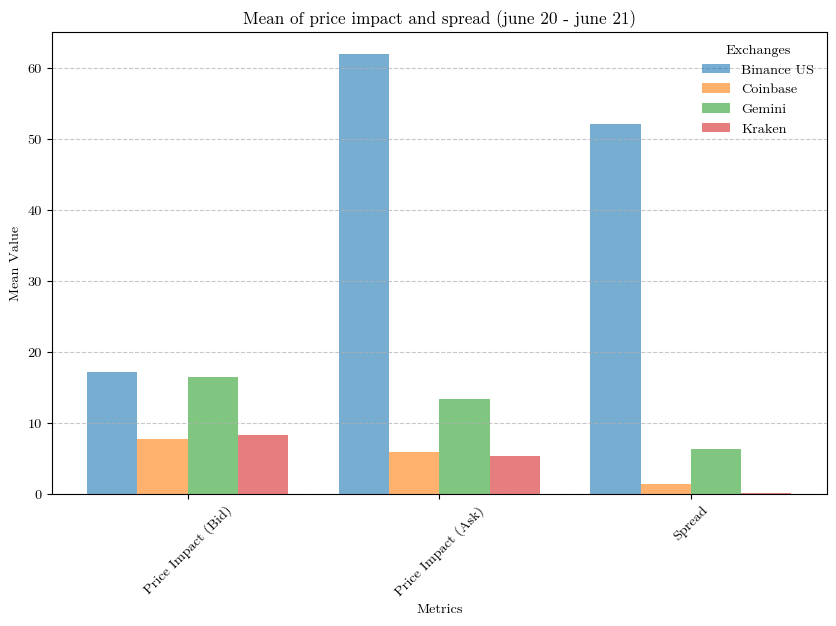

Analysis complete for start_time: 2024-06-20 00:00:00, end_time: 2024-06-21 00:00:00
Extracting data from the database for start_time: 2024-06-01 00:00:00 to end_time: 2024-06-03 21:00:00


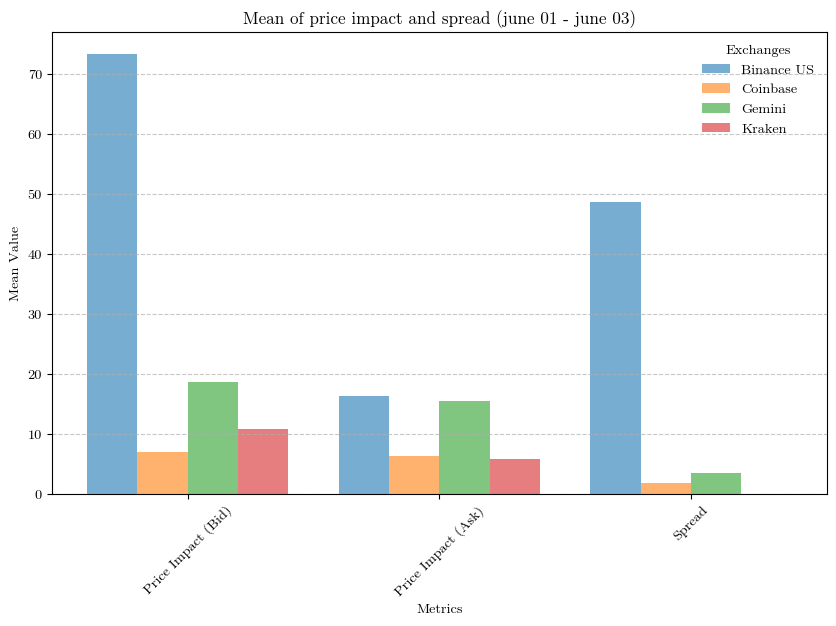

Analysis complete for start_time: 2024-06-01 00:00:00, end_time: 2024-06-03 21:00:00
Extracting data from the database for start_time: 2024-09-24 22:00:00 to end_time: 2024-09-25 22:00:00


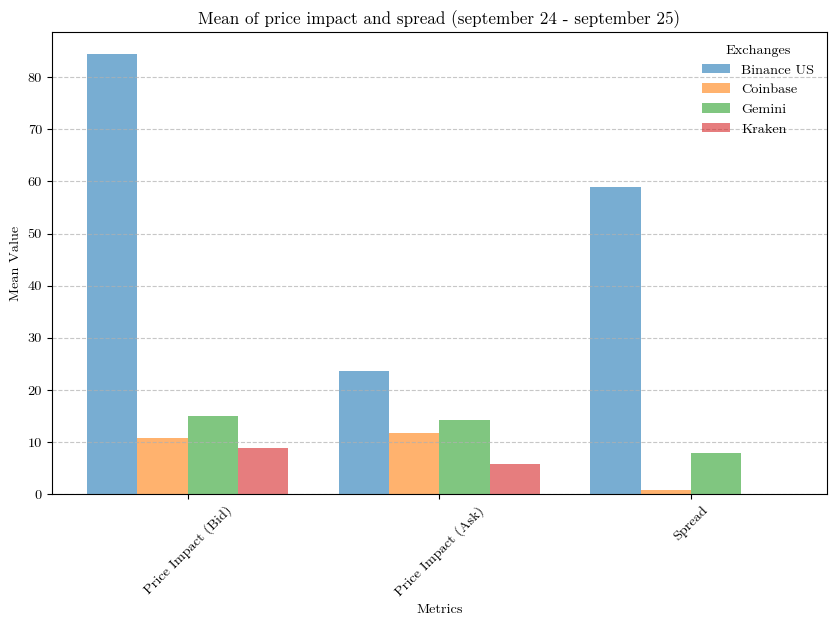

Analysis complete for start_time: 2024-09-24 22:00:00, end_time: 2024-09-25 22:00:00
Extracting data from the database for start_time: 2024-09-26 22:00:00 to end_time: 2024-09-27 18:00:00


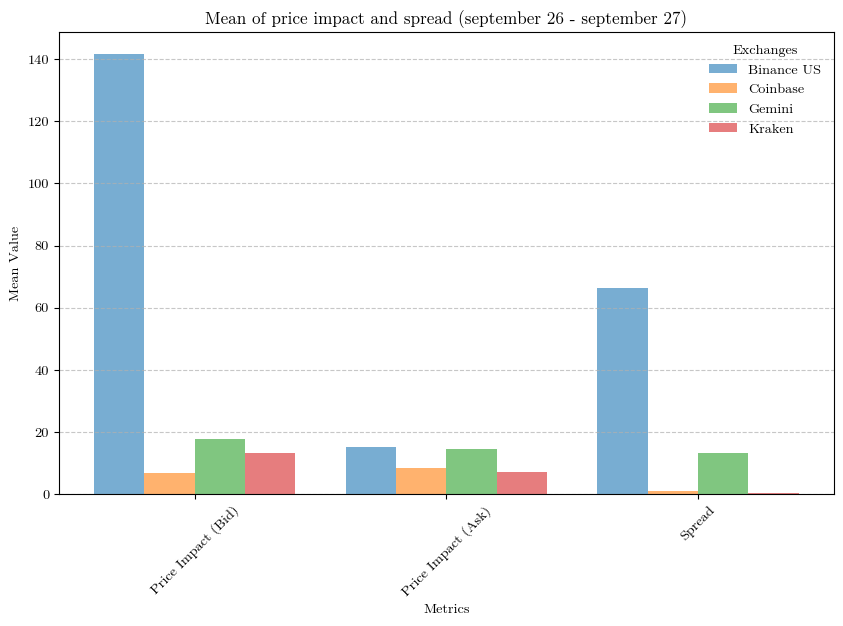

Analysis complete for start_time: 2024-09-26 22:00:00, end_time: 2024-09-27 18:00:00
Extracting data from the database for start_time: 2024-10-17 08:00:00 to end_time: 2024-10-17 18:00:00


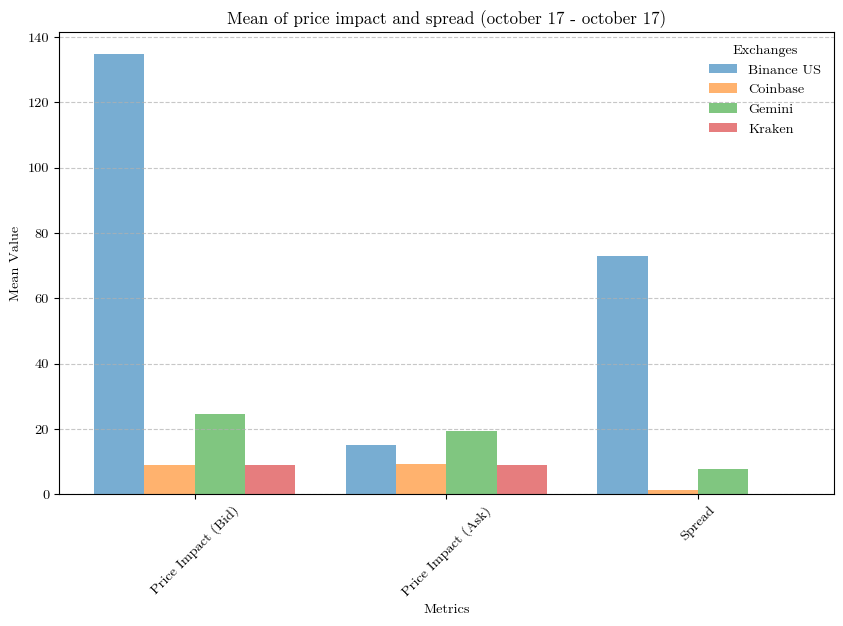

Analysis complete for start_time: 2024-10-17 08:00:00, end_time: 2024-10-17 18:00:00


In [7]:
to_keep = ['binanceUs','coinbase', 'gemini', 'kraken']  # Exchanges to analyze

for time in times:
    analyze_and_plot_liquidity(
        db_name=db_name,
        num_obs=None,  # Adjust as needed
        start_time=time['start_time'],
        end_time=time['end_time'],
        to_keep=to_keep,
        columns=['price_impact_bid', 'price_impact_ask', 'spread'],
        colors=colors
    )


In [8]:
threshold = timedelta(seconds=4)
binance_df_indexed = binanceUs_df.copy()
coinbase_df_indexed = coinbase_df.copy()
gemini_df_indexed = gemini_df.copy()
kraken_df_indexed = kraken_df.copy()
coinbase_df_indexed = coinbase_df_indexed.add_prefix('c_')
binance_df_indexed = binance_df_indexed.add_prefix('b_')
gemini_df_indexed = gemini_df_indexed.add_prefix('g_')
kraken_df_indexed = kraken_df_indexed.add_prefix('k_')
dfs = [binance_df_indexed, coinbase_df_indexed, kraken_df_indexed, gemini_df_indexed]
merged_df = merge_dfs_within_time_tolerance(dfs, reference_df_index=0)
all_ex_indexed = merged_df
changes_df = all_ex_indexed.select_dtypes(include=['number']).diff()
total_df = pd.concat([all_ex_indexed.select_dtypes(include=['object','datetime']),changes_df], axis=1)
time_df = all_ex_indexed[['b_time','c_time','g_time','k_time']]

In [9]:
merged_numeric_df = merged_df.select_dtypes(include=['number'])

diff_df = merged_numeric_df.diff()

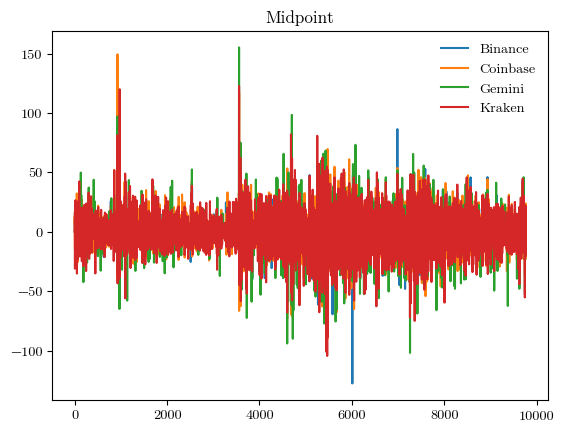

In [10]:
plt.plot(diff_df['b_midpoint'])
plt.plot(diff_df['c_midpoint'])
plt.plot(diff_df['k_midpoint'])
plt.plot(diff_df['g_midpoint'])
plt.legend(['Binance','Coinbase','Gemini','Kraken'])
plt.title('Midpoint')
plt.show()

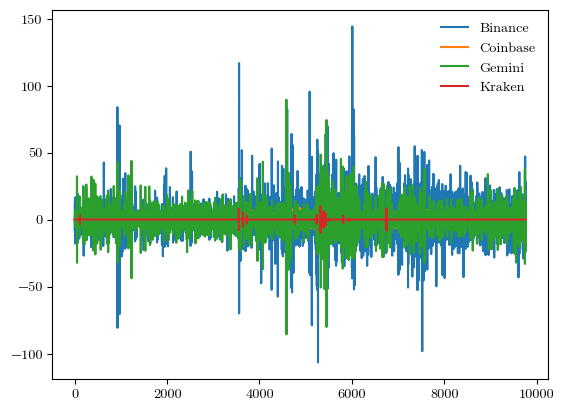

In [11]:
plt.plot(diff_df['b_spread'])
plt.plot(diff_df['c_spread'])
plt.plot(diff_df['g_spread'])
plt.plot(diff_df['k_spread'])
plt.legend(['Binance','Coinbase','Gemini','Kraken'])
plt.show()

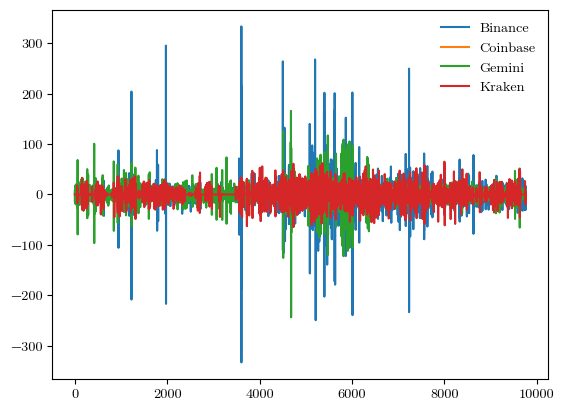

In [12]:
plt.plot(diff_df['b_price_impact_bid'])
plt.plot(diff_df['c_price_impact_bid'])
plt.plot(diff_df['g_price_impact_bid'])
plt.plot(diff_df['k_price_impact_bid'])
plt.legend(['Binance','Coinbase','Gemini','Kraken'], frameon=False)
plt.show()

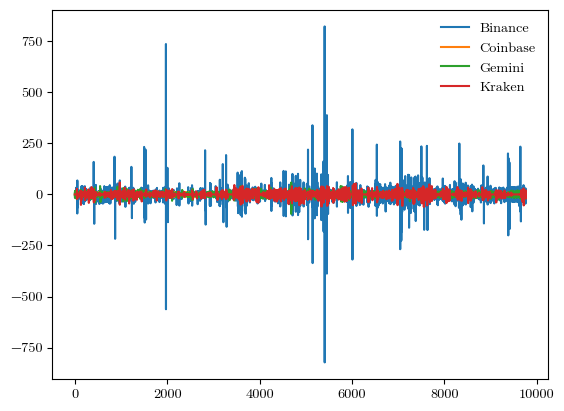

In [13]:
plt.plot(diff_df['b_price_impact_ask'])
plt.plot(diff_df['c_price_impact_ask'])
plt.plot(diff_df['g_price_impact_ask'])
plt.plot(diff_df['k_price_impact_ask'])
plt.legend(['Binance','Coinbase','Gemini','Kraken'], frameon=False)
plt.show()

In [14]:
diff_df.describe()

b_midpoint     b_spread  b_price_impact_bid  b_price_impact_ask  \
count  9763.000000  9763.000000         9763.000000         9763.000000   
mean     -0.049350    -0.003457            0.000588           -0.003156   
std       7.394432     9.093333           16.944084           26.583155   
min    -127.700000  -106.600000         -333.270000         -822.680000   
25%      -0.100000    -0.310000           -0.180000            0.000000   
50%       0.000000    -0.080000            0.000000            0.000000   
75%       0.100000     0.000000            0.350000            0.110000   
max      87.800000   144.150000          333.440000          822.870000   

       b_price_impact_bid_quantity  b_price_impact_ask_quantity   c_midpoint  \
count                       9763.0                       9763.0  9754.000000   
mean                           0.0                          0.0    -0.051845   
std                            0.0                          0.0    11.945404   
min                            0.0                          0.0   -89.700000   
25%                            0.0                          0.0    -5.100000   
50%                            0.0                          0.0     0.000000   
75%                            0.0                          0.0     4.900000   
max                            0.0                          0.0   149.400000   

          c_spread  c_price_impact_bid  c_price_impact_ask  ...  \
count  9754.000000         9754.000000         9754.000000  ...   
mean     -0.000390            0.001196           -0.001189  ...   
std       2.372203            3.594866            4.013216  ...   
min     -10.050000          -21.530000          -19.170000  ...   
25%      -0.870000           -2.050000           -2.150000  ...   
50%       0.000000            0.000000            0.000000  ...   
75%       0.850000            2.080000            2.140000  ...   
max      10.230000           19.970000           19.170000  ...   

       k_price_impact_bid  k_price_impact_ask  k_price_impact_bid_quantity  \
count         9758.000000        9.758000e+03                       9758.0   
mean             0.000215        8.373890e-18                          0.0   
std              9.488282        7.069687e+00                          0.0   
min            -64.800000       -6.110000e+01                          0.0   
25%              0.000000        0.000000e+00                          0.0   
50%              0.000000        0.000000e+00                          0.0   
75%              0.000000        0.000000e+00                          0.0   
max             65.100000        5.920000e+01                          0.0   

       k_price_impact_ask_quantity   g_midpoint     g_spread  \
count                       9758.0  9763.000000  9763.000000   
mean                           0.0    -0.052043     0.000583   
std                            0.0    12.235649     6.345894   
min                            0.0  -104.600000   -85.700000   
25%                            0.0    -4.700000    -1.180000   
50%                            0.0     0.000000     0.000000   
75%                            0.0     4.700000     1.120000   
max                            0.0   122.700000    89.500000   

       g_price_impact_bid  g_price_impact_ask  g_price_impact_bid_quantity  \
count         9763.000000         9763.000000                       9763.0   
mean            -0.000440           -0.000790                          0.0   
std             12.301959            6.814404                          0.0   
min           -243.770000          -95.130000                          0.0   
25%             -3.665000           -3.175000                          0.0   
50%              0.000000            0.000000                          0.0   
75%              3.805000            3.135000                          0.0   
max            165.780000           58.460000                          0.0   

       g_price_impact_as

In [15]:
merged_df.describe()

b_time    b_midpoint     b_spread  \
count                           9764   9764.000000  9764.000000   
mean   2024-06-20 06:46:51.138365440  65437.891817    52.080808   
min              2024-06-20 00:00:00  64581.100000     0.010000   
25%    2024-06-20 03:23:27.750000128  64970.000000    39.270000   
50%       2024-06-20 06:46:51.500000  65529.600000    54.300000   
75%       2024-06-20 10:10:14.500000  65814.725000    64.380000   
max              2024-06-20 13:33:38  66436.900000   250.830000   
std                              NaN    487.192947    19.670516   

       b_price_impact_bid  b_price_impact_ask  b_price_impact_bid_quantity  \
count         9764.000000         9764.000000                       9764.0   
mean            17.175710           61.932788                          1.0   
min              0.000000            0.000000                          1.0   
25%              0.140000           18.957500                          1.0   
50%              7.650000           63.110000                          1.0   
75%             19.712500           85.562500                          1.0   
max            402.220000          826.670000                          1.0   
std             32.625134           52.859777                          0.0   

       b_price_impact_ask_quantity                         c_time  \
count                       9764.0                           9758   
mean                           1.0  2024-06-20 06:46:50.198606336   
min                            1.0            2024-06-20 00:00:00   
25%                            1.0  2024-06-20 03:23:29.249999872   
50%                            1.0     2024-06-20 06:46:45.500000   
75%                            1.0  2024-06-20 10:10:15.750000128   
max                            1.0            2024-06-20 13:33:37   
std                            0.0                            NaN   

         c_midpoint     c_spread  ...  k_price_impact_ask  \
count   9758.000000  9758.000000  ...         9760.000000   
mean   65396.635151     1.454451  ...            5.421230   
min    64510.600000     0.010000  ...            0.000000   
25%    64911.400000     0.010000  ...            0.000000   
50%    65491.450000     0.010000  ...            0.000000   
75%    65791.000000     2.630000  ...            5.400000   
max    66455.500000    12.830000  ...           71.800000   
std      501.295258     2.012927  ...           11.110108   

       k_price_impact_bid_quantity  k_price_impact_ask_quantity  \
count                       9760.0                       9760.0   
mean                           1.0                          1.0   
min                            1.0                          1.0   
25%                            1.0                          1.0   
50%                            1.0                          1.0   
75%                            1.0                          1.0   
max                            1.0                          1.0   
std                            0.0                          0.0   

                              g_time    g_midpoint     g_spread  \
count                           9764   9764.000000  9764.000000   
mean   2024-06-20 06:46:51.288201728  65398.250061     6.384087   
min              2024-06-20 00:00:03  64521.100000     0.010000   
25%    2024-06-20 03:23:26.750000128  64917.100000     2.420000   
50%       2024-06-20 06:46:51.500000  65488.500000     6.080000   
75%    2024-06-20 10:10:16.249999872  65788.825000     6.180000   
max              2024-06-20 13:33:39  66455.300000    91.890000   
std                              NaN    499.458911     7.077541   

       g_price_impact_bid  g_price_impact_ask  g_price_impact_bid_quantity  \
count         9764.000000         9764.000000                       9764.0   
mean            16.473202           13.410197                          1.0   
min              0.000000            0.000000                          1.0   
25%             11.560000      

Graph and Analysis

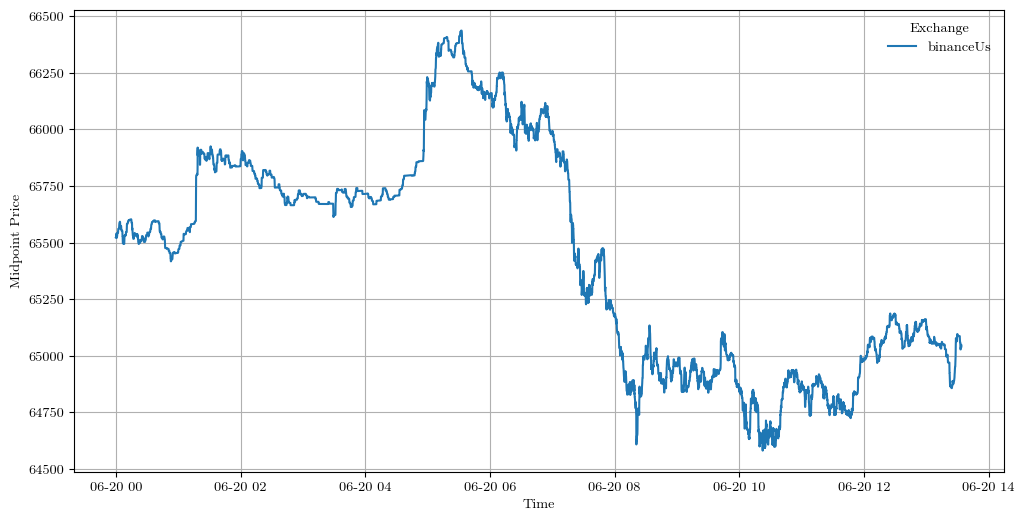

In [16]:
single_plot_over_time(binanceUs_df,'midpoint')

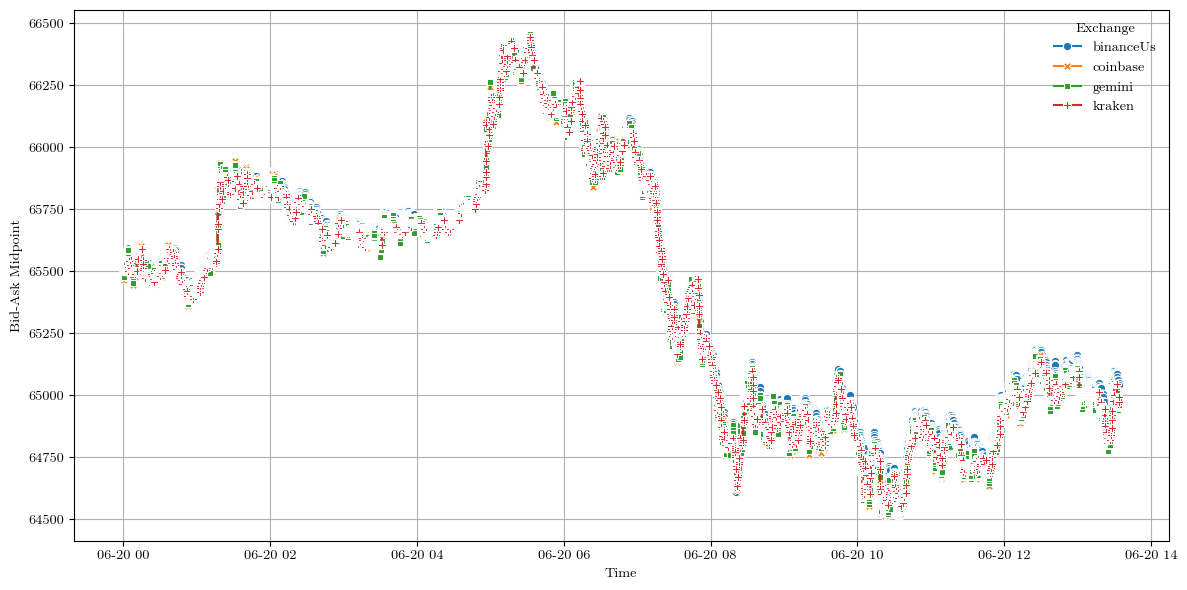

In [17]:
short_list = [binanceUs_df,gemini_df,kraken_df,coinbase_df]
together_df = pd.concat(dfs_dict)
together_plot_attr_over_time(together_df,'midpoint')

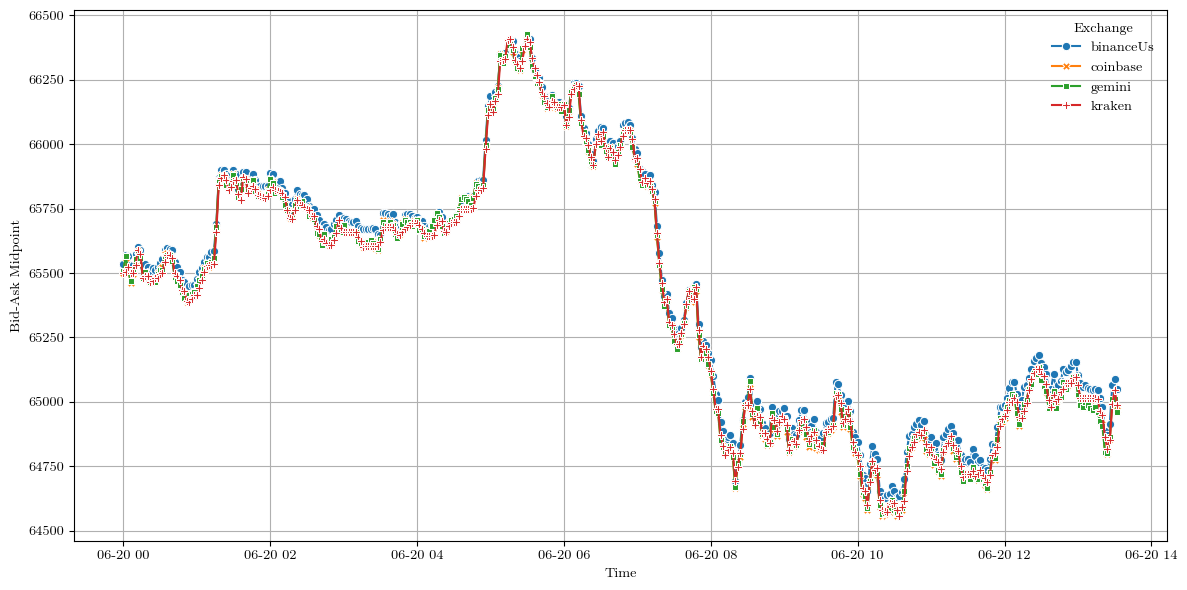

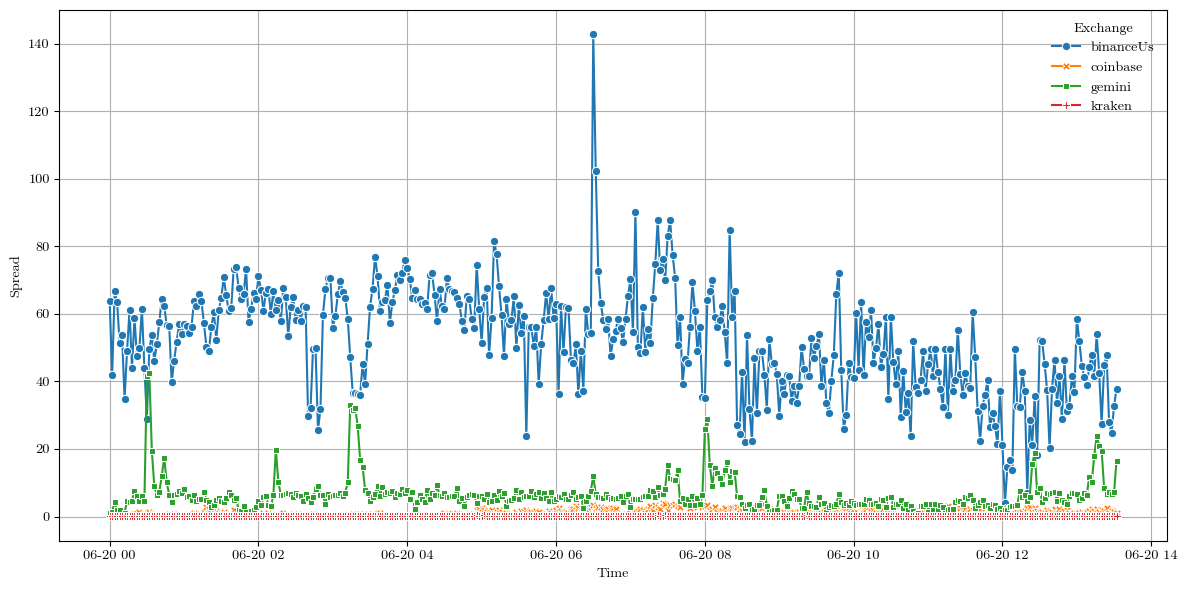

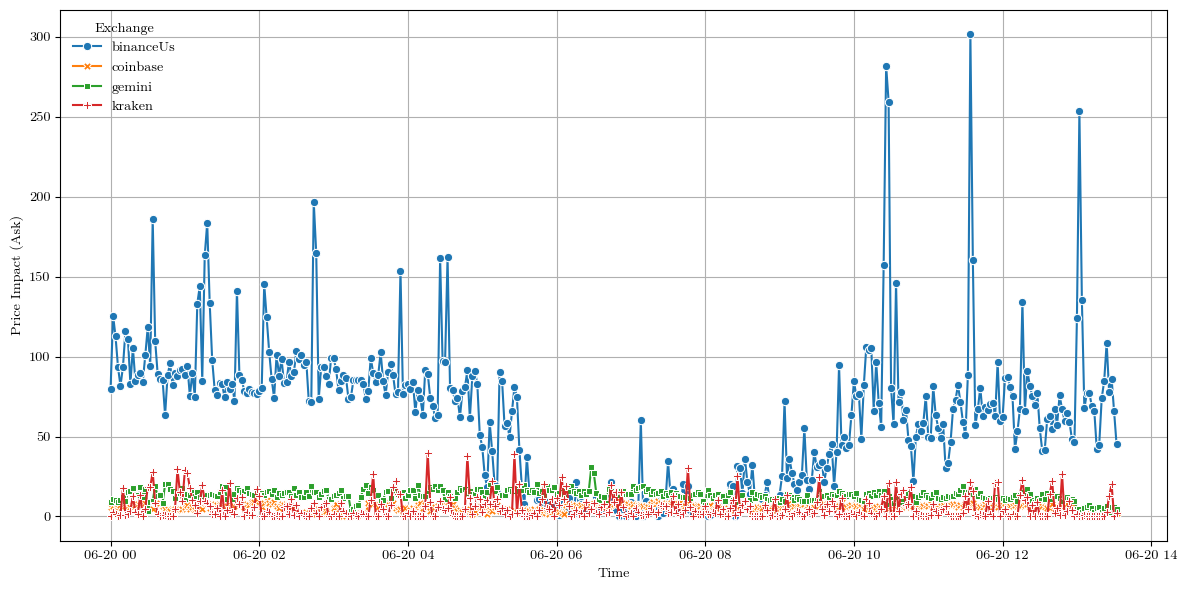

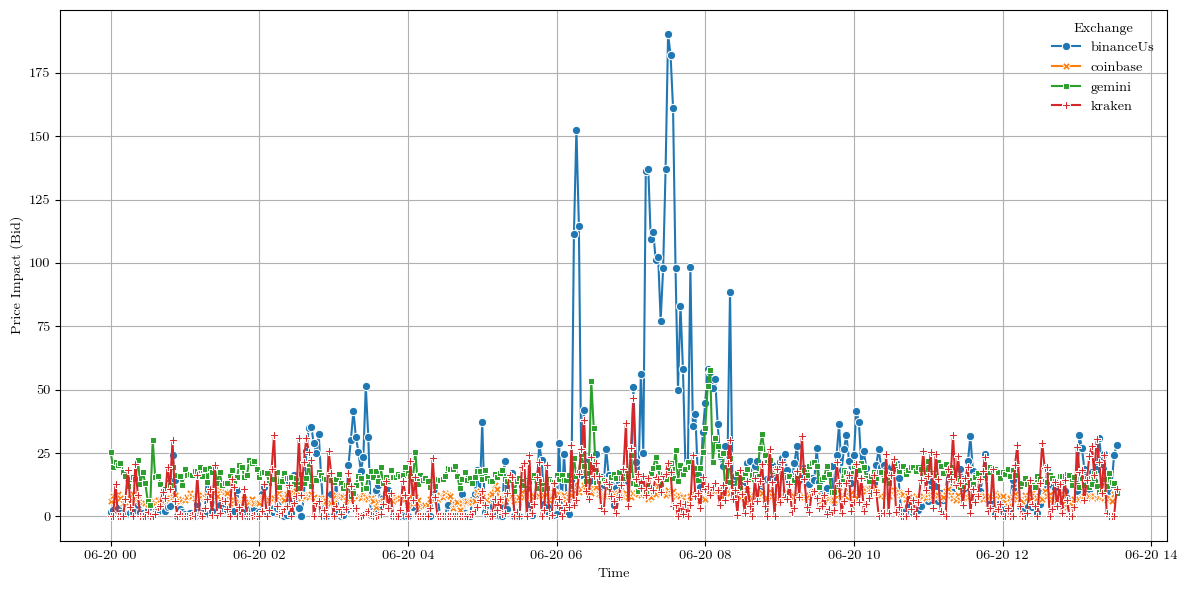

In [18]:
for attribute in columns:
    ylim = None
    if attribute == 'midpoint':
        ylim=None
    #else:
        #ylim=(0,100)
    # This is the binned plot to hopefully show a more readable output. We sacrifice some variation but I think these plots could actually be helpful. 
    # For the last time period, this plot shows what happens when the price goes down. As expected, the price impact for the bids goes up and for the asks goes down. The affect seems to be more pronounced for BinanceUS. This is another indicator that BinanceUS is less liquid than the other exchanges.
    together_plot_attr_over_time(together_df, attribute, ylim=ylim, binned=True, bw=False) # bw=True makes it black and white

In [19]:
"""for name, df in dfs_dict.items():
    together_plot_exc_over_time(df, columns,start_time=df['time'].min(), end_time=df['time'].min() + timedelta(minutes=5))"""

"for name, df in dfs_dict.items():\n    together_plot_exc_over_time(df, columns,start_time=df['time'].min(), end_time=df['time'].min() + timedelta(minutes=5))"

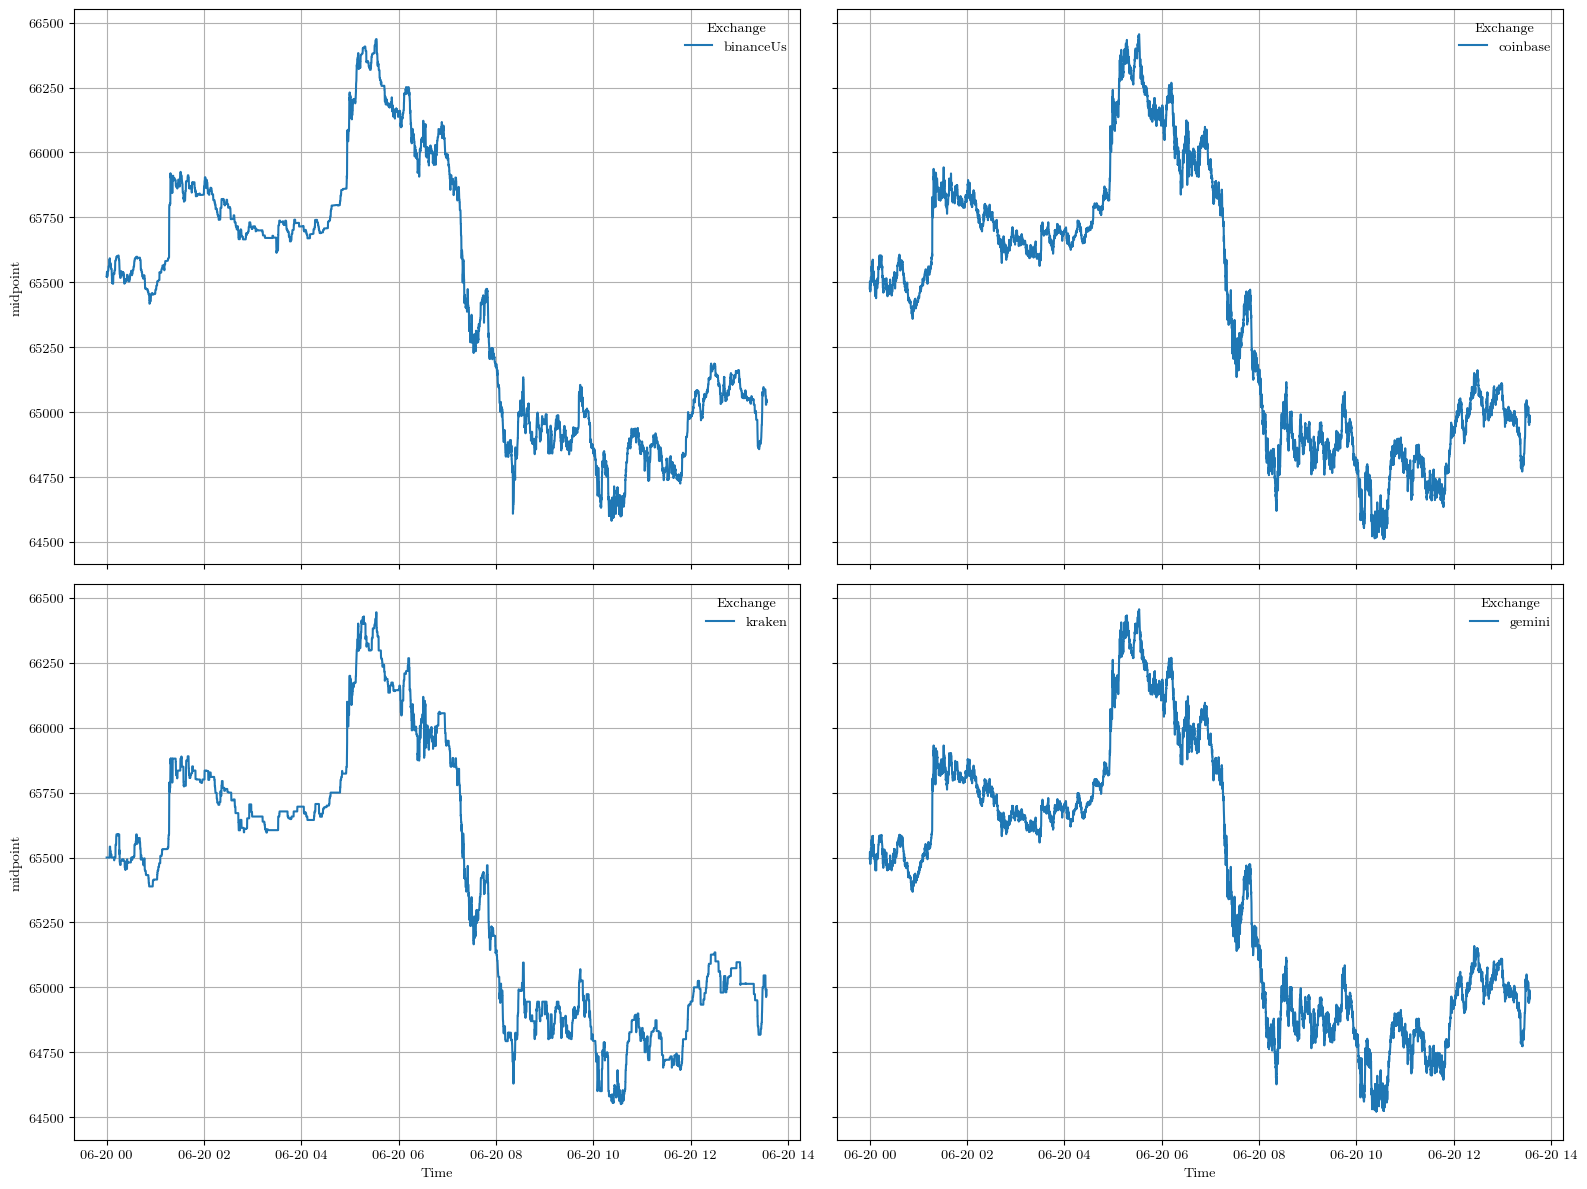

In [20]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

# Plot each DataFrame
subplot_plot_over_time(axes[0, 0], binanceUs_df, y='midpoint')
subplot_plot_over_time(axes[0, 1], coinbase_df, y='midpoint')
subplot_plot_over_time(axes[1, 0], kraken_df, y='midpoint')
subplot_plot_over_time(axes[1, 1], gemini_df, y='midpoint')

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
univariate_stats(time_df,gen_charts=False)

Count  Null  Total  Unique            Type Min Max 25% 50% 75% Mean  \
b_time   9764     0   9764    9764  datetime64[ns]   -   -   -   -   -    -   
c_time   9758     6   9764    9364  datetime64[ns]   -   -   -   -   -    -   
g_time   9764     0   9764    9763  datetime64[ns]   -   -   -   -   -    -   
k_time   9760     4   9764    9523  datetime64[ns]   -   -   -   -   -    -   

       Std Skew Kurt  
b_time   -    -    -  
c_time   -    -    -  
g_time   -    -    -  
k_time   -    -    -

In [22]:
time_df['k_time'].isna().value_counts()

k_time
False    9760
True        4
Name: count, dtype: int64

In [23]:
binanceUs_df.drop(['time'], axis=1).describe().T

count          mean         std       min  \
midpoint                   9764.0  65437.891817  487.192947  64581.10   
spread                     9764.0     52.080808   19.670516      0.01   
price_impact_bid           9764.0     17.175710   32.625134      0.00   
price_impact_ask           9764.0     61.932788   52.859777      0.00   
price_impact_bid_quantity  9764.0      1.000000    0.000000      1.00   
price_impact_ask_quantity  9764.0      1.000000    0.000000      1.00   

                                  25%       50%         75%       max  
midpoint                   64970.0000  65529.60  65814.7250  66436.90  
spread                        39.2700     54.30     64.3800    250.83  
price_impact_bid               0.1400      7.65     19.7125    402.22  
price_impact_ask              18.9575     63.11     85.5625    826.67  
price_impact_bid_quantity      1.0000      1.00      1.0000      1.00  
price_impact_ask_quantity      1.0000      1.00      1.0000      1.00

In [24]:
coinbase_df.drop(['time'], axis=1).describe().T

count          mean         std       min  \
midpoint                   9420.0  65396.453514  501.371408  64510.60   
spread                     9420.0      1.444978    2.006284      0.01   
price_impact_bid           9420.0      7.813567    3.208901      0.00   
price_impact_ask           9420.0      5.941156    3.650738      0.00   
price_impact_bid_quantity  9420.0      1.000000    0.000000      1.00   
price_impact_ask_quantity  9420.0      1.000000    0.000000      1.00   

                                 25%       50%        75%       max  
midpoint                   64910.775  65490.90  65791.025  66455.50  
spread                         0.010      0.01      2.620     12.83  
price_impact_bid               5.880      7.58      9.690     27.37  
price_impact_ask               3.480      6.26      8.330     20.06  
price_impact_bid_quantity      1.000      1.00      1.000      1.00  
price_impact_ask_quantity      1.000      1.00      1.000      1.00

In [25]:
gemini_df.drop(['time'], axis=1).describe().T

count          mean         std       min  \
midpoint                   9764.0  65398.252376  499.459412  64521.10   
spread                     9764.0      6.387417    7.082188      0.01   
price_impact_bid           9764.0     16.470235   11.026775      0.00   
price_impact_ask           9764.0     13.411133    6.764617      0.00   
price_impact_bid_quantity  9764.0      1.000000    0.000000      1.00   
price_impact_ask_quantity  9764.0      1.000000    0.000000      1.00   

                                25%       50%        75%       max  
midpoint                   64917.10  65488.50  65788.825  66455.30  
spread                         2.42      6.08      6.180     91.89  
price_impact_bid              11.56     15.59     19.640    244.04  
price_impact_ask               9.29     13.37     16.990    113.57  
price_impact_bid_quantity      1.00      1.00      1.000      1.00  
price_impact_ask_quantity      1.00      1.00      1.000      1.00

In [26]:
kraken_df.drop(['time'], axis=1).describe().T

count          mean         std      min      25%  \
midpoint                   9749.0  65400.474315  495.670817  64550.1  64932.9   
spread                     9749.0      0.106390    0.194575      0.1      0.1   
price_impact_bid           9749.0      8.398923   14.172094      0.0      0.0   
price_impact_ask           9749.0      5.424259   11.122876      0.0      0.0   
price_impact_bid_quantity  9749.0      1.000000    0.000000      1.0      1.0   
price_impact_ask_quantity  9749.0      1.000000    0.000000      1.0      1.0   

                               50%      75%      max  
midpoint                   65492.1  65776.5  66444.6  
spread                         0.1      0.1     10.0  
price_impact_bid               0.0     13.2     70.7  
price_impact_ask               0.0      5.4     71.8  
price_impact_bid_quantity      1.0      1.0      1.0  
price_impact_ask_quantity      1.0      1.0      1.0

Distribution Plots

In [27]:
# Graph a distribution for each column for each exchange
# graph_dist_seperate(filtered_df,columns, bins=15)

Create Correlation Tables

In [28]:
spread_df = pd.concat([binanceUs_df['spread'].reset_index(drop=True),coinbase_df['spread'].reset_index(drop=True),gemini_df['spread'].reset_index(drop=True),kraken_df['spread'].reset_index(drop=True)], axis=1)
spread_df.columns = ['Binance', 'Coinbase', 'Gemini', 'Kraken']
spread_df.corr()

Binance  Coinbase    Gemini    Kraken
Binance   1.000000 -0.055021  0.028414  0.023685
Coinbase -0.055021  1.000000 -0.045042  0.000550
Gemini    0.028414 -0.045042  1.000000 -0.002284
Kraken    0.023685  0.000550 -0.002284  1.000000

In [29]:
p_i_b = pd.concat([binanceUs_df['price_impact_bid'].reset_index(drop=True),coinbase_df['price_impact_bid'].reset_index(drop=True),gemini_df['price_impact_bid'].reset_index(drop=True),kraken_df['price_impact_bid'].reset_index(drop=True)], axis=1)
p_i_b.columns = ['Binance', 'Coinbase', 'Gemini', 'Kraken']
p_i_b.corr()

Binance  Coinbase    Gemini    Kraken
Binance   1.000000  0.078497  0.053819  0.144284
Coinbase  0.078497  1.000000  0.020446  0.063180
Gemini    0.053819  0.020446  1.000000  0.019985
Kraken    0.144284  0.063180  0.019985  1.000000

In [30]:
p_i_a = pd.concat([binanceUs_df['price_impact_ask'].reset_index(drop=True),coinbase_df['price_impact_ask'].reset_index(drop=True),gemini_df['price_impact_ask'].reset_index(drop=True),kraken_df['price_impact_ask'].reset_index(drop=True)], axis=1)
p_i_a.columns = ['Binance', 'Coinbase', 'Gemini', 'Kraken']
p_i_a.corr()

Binance  Coinbase    Gemini    Kraken
Binance   1.000000 -0.045674 -0.050581  0.109909
Coinbase -0.045674  1.000000  0.003140  0.003855
Gemini   -0.050581  0.003140  1.000000  0.016513
Kraken    0.109909  0.003855  0.016513  1.000000

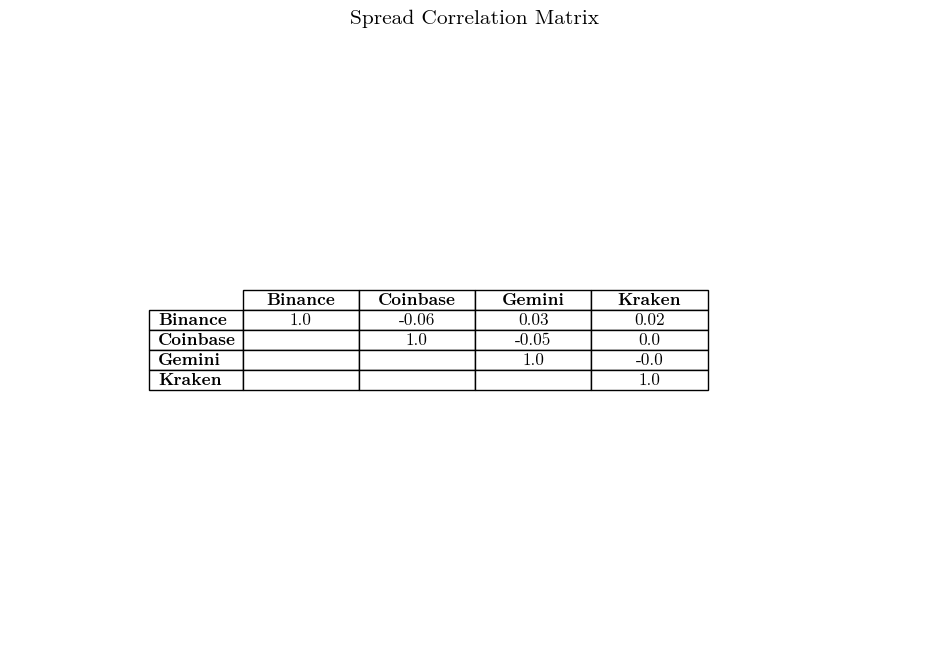

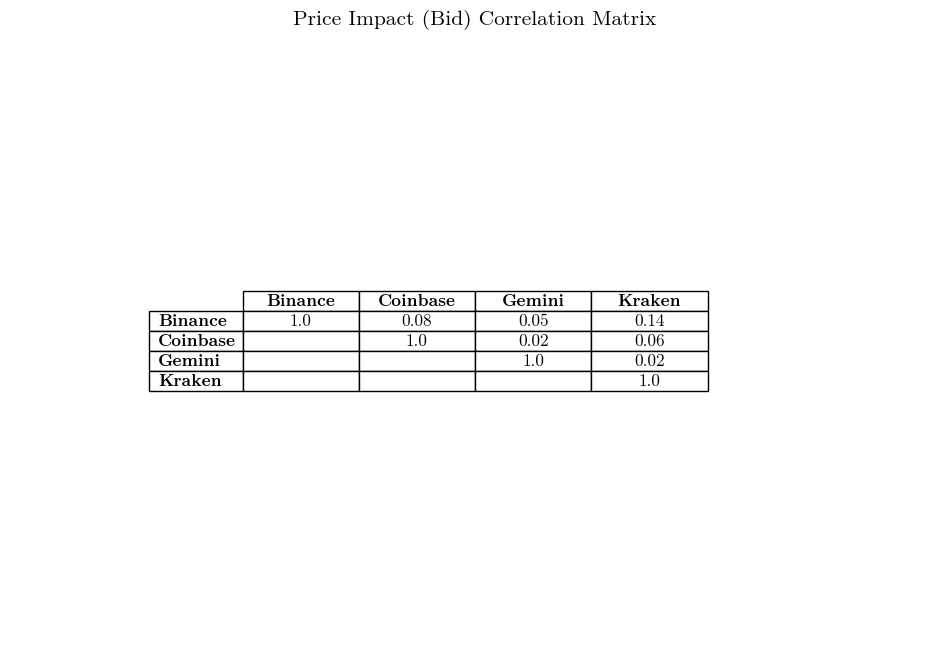

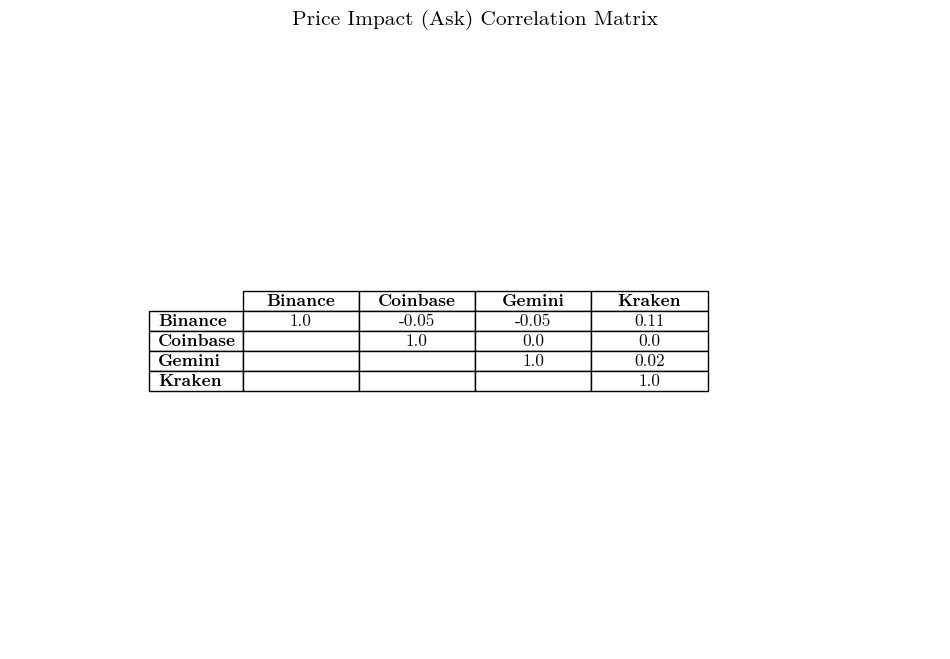

In [31]:
matrix_output = {"Spread Correlation Matrix": spread_df, "Price Impact (Bid) Correlation Matrix":p_i_b, "Price Impact (Ask) Correlation Matrix":p_i_a}
for title, df in matrix_output.items():
    display_and_save_correlation_matrix(df, title)

Graph Plots together for exportation

In [32]:
colors = ['blue','yellow','green','red']

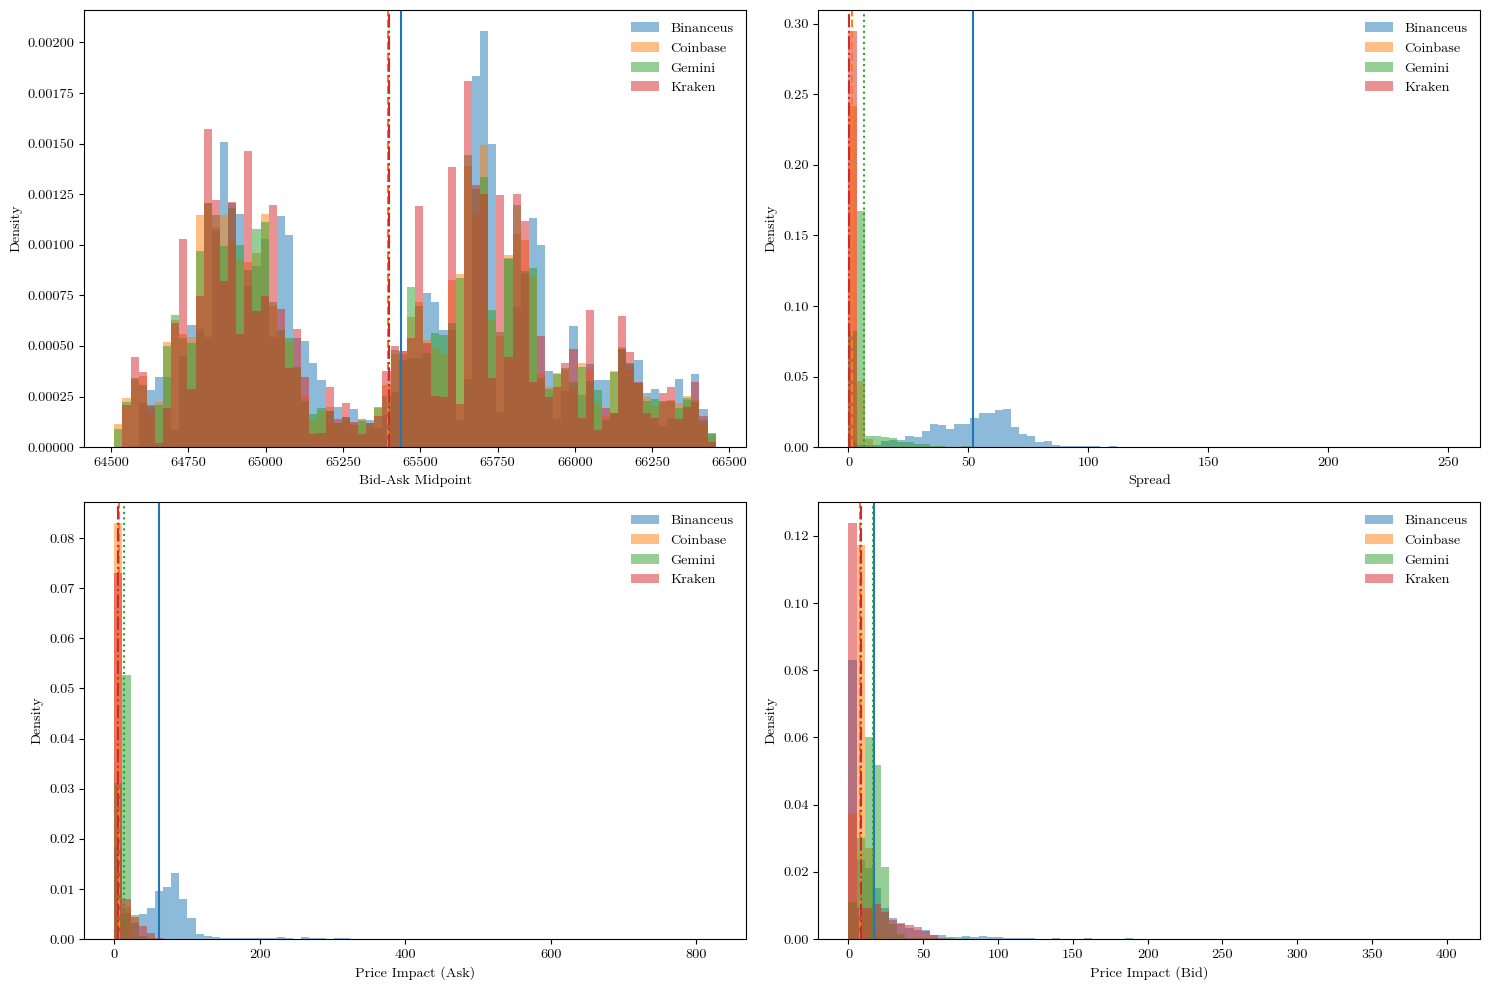

In [33]:
# Graph a distribution for each column for all exchanges on one graph
graph_dist_together_subplots(filtered_df,columns) #bw=True makes it black and white

Graph the CDF

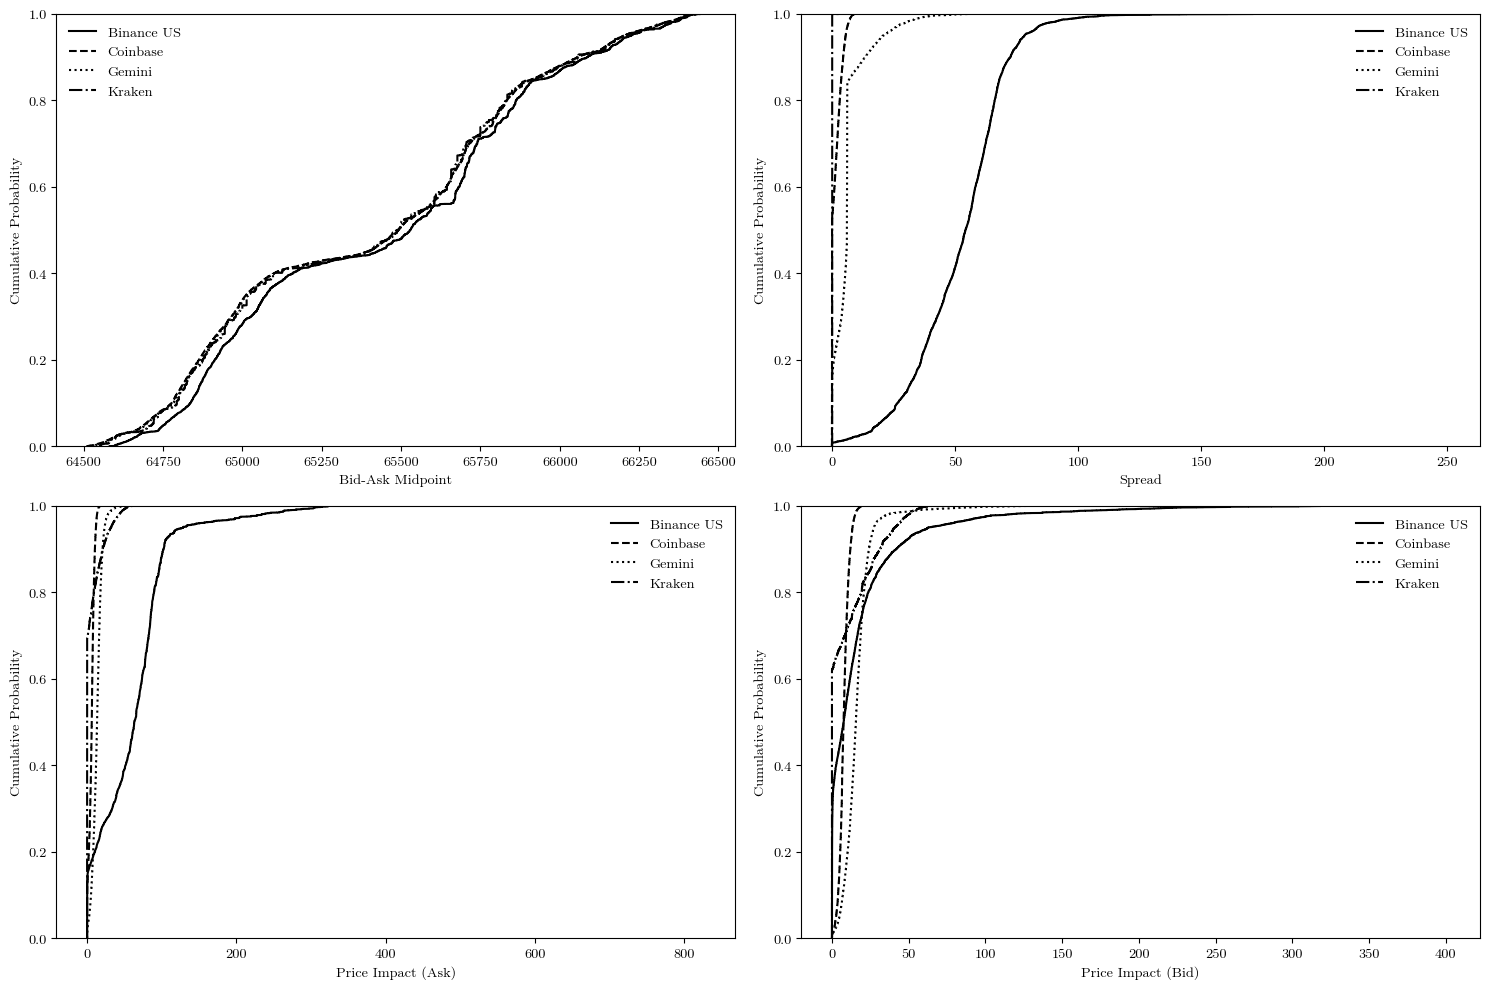

In [34]:
graph_cdf_together(filtered_df,columns,bins=30, bw=True)

Dataframes and Plots for Summary Stats

In [35]:
#desc_df_selected.drop(['bitflyer','bitrue'], inplace=True)
desc_df_selected = desc_df_selected.loc[['coinbase','binanceUs','gemini','kraken']] # ['coinbase','binanceUs','gemini','kraken']
desc_df_selected = desc_df_selected[['spread','price_impact_bid','price_impact_ask']]

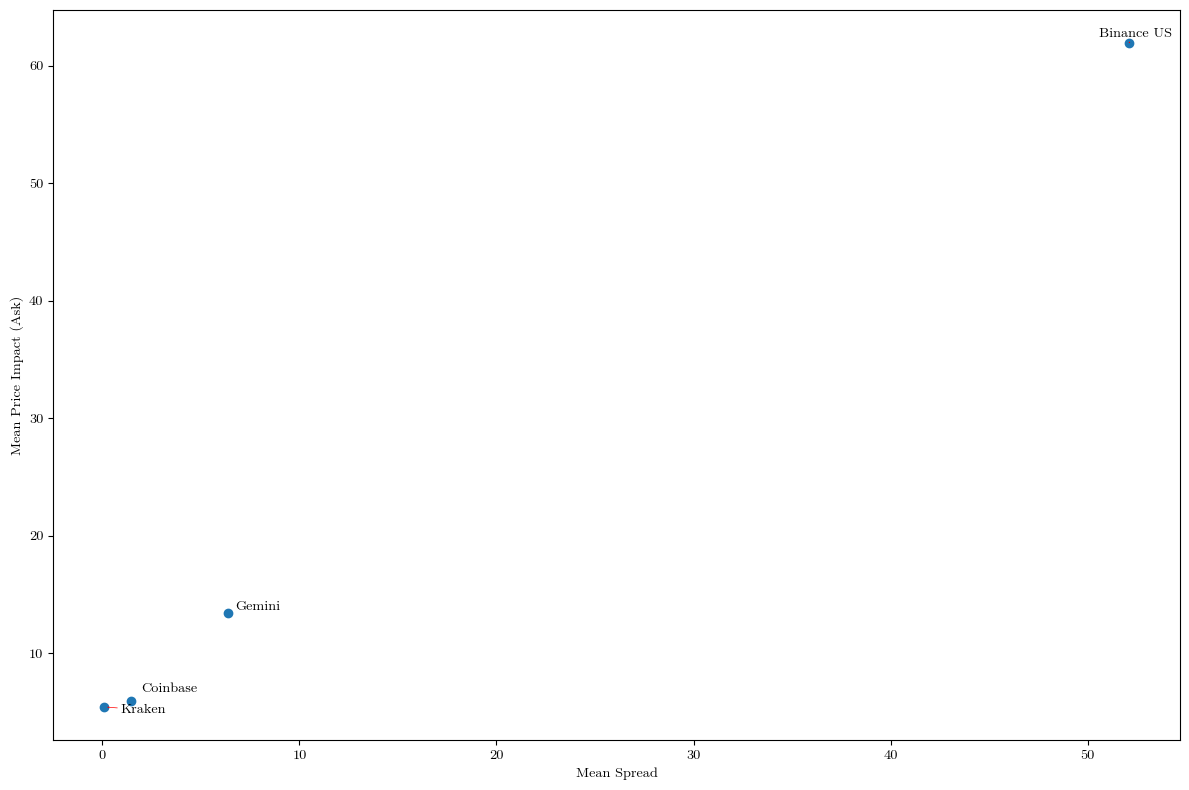

In [36]:
scatter_ex(desc_df_selected, x_col='spread', y_col='price_impact_ask')

Tables

In [37]:
import pandas as pd
# Prepare df for stats by sorting the relevant values
spread_std_df = desc_df_selected.sort_values(by=('spread','mean'), ascending=False)['spread']['std'].round(3)
pi_b_df = desc_df_selected.sort_values(by=('price_impact_bid', 'mean'), ascending=False)['price_impact_bid']['std'].round(3)
pi_a_df = desc_df_selected.sort_values(by=('price_impact_ask', 'mean'), ascending=False)['price_impact_ask']['std'].round(3)
# Combine df with important information
combined_df = pd.concat([spread_std_df, pi_b_df, pi_a_df] ,axis=1)
# Rename the columns to be capitalized and look better
combined_df.columns = ['Spread','Price Impact (Bid)','Price Impact (Ask)']
# Make Exchange a column and capitalize it
combined_df = combined_df.reset_index().rename(columns={'exchange':'Exchange'})
# Capitalize the exchange values
combined_df['Exchange'] = combined_df['Exchange'].str.capitalize()

In [50]:
output_tables(combined_df,'Volatility')

Output()

\begin{center}
\begin{table}[ht]
    \centering
    \begin{tabular}{c ccc}
    \toprule
     & Exchange & Spread & Price Impact (Bid) & Price Impact (Ask) \\
     \midrule
  Binanceus 19.67 32.62 52.86 \\
  Gemini 7.08 11.03 6.76 \\
  Coinbase 2.01 3.21 3.65 \\
  Kraken 0.20 14.17 11.12 \\
    \bottomrule
    \end{tabular}
    \caption{Volatility}
    \label{tab:my_label}
\end{table}
\end{center}


Regression

In [39]:
all_ex_indexed_reg = total_df.drop(columns=['b_time','c_time','k_time','g_time','b_exchange','c_exchange','k_exchange','g_exchange','b_price_impact_ask_quantity','c_price_impact_ask_quantity','g_price_impact_ask_quantity','k_price_impact_ask_quantity','b_price_impact_bid_quantity','c_price_impact_bid_quantity','g_price_impact_bid_quantity','k_price_impact_bid_quantity'])

In [40]:
all_ex_indexed_reg

b_midpoint  b_spread  b_price_impact_bid  b_price_impact_ask  \
0            NaN       NaN                 NaN                 NaN   
1            0.6     -1.26                1.22                0.04   
2            4.2     -8.49                8.42                0.06   
3            2.9     -5.83               -4.53                0.02   
4            9.5     13.52               -0.49              -16.33   
...          ...       ...                 ...                 ...   
9759        -0.7      1.53               -1.53                0.00   
9760        10.2    -12.88               16.73               -3.82   
9761         2.0     -3.93              -30.22                0.00   
9762         0.0      0.00               10.27                0.00   
9763        -8.4     -2.71              -10.26                9.72   

      c_midpoint  c_spread  c_price_impact_bid  c_price_impact_ask  \
0            NaN       NaN                 NaN                 NaN   
1            6.5      0.87                1.97               -5.88   
2           12.8     -0.87               -1.70                5.78   
3            8.0      0.00               -3.76               -4.93   
4           -2.2      1.92                0.50                0.27   
...          ...       ...                 ...                 ...   
9759       -18.1      0.00                2.43                0.10   
9760        18.2      0.00                1.99               -0.17   
9761       -16.3      0.00               -1.47                0.27   
9762        23.8      1.23                4.11                3.64   
9763       -22.7     -1.23                6.45               -4.24   

      k_midpoint  k_spread  k_price_impact_bid  k_price_impact_ask  \
0            NaN       NaN                 NaN                 NaN   
1            NaN       NaN                 NaN                 NaN   
2            0.0       0.0                 0.0                 0.0   
3            0.0       0.0                 0.0                 0.0   
4            0.0       0.0                 0.0                 0.0   
...          ...       ...                 ...                 ...   
9759         0.0       0.0                 0.0               -18.4   
9760         0.0       0.0                 0.0                 0.0   
9761         0.0       0.0                 0.0                19.1   
9762         0.0       0.0                 0.0                 0.0   
9763        19.5       0.0                 2.1               -19.1   

      g_midpoint  g_spread  g_price_impact_bid  g_price_impact_ask  
0            NaN       NaN                 NaN                 NaN  
1            0.0      0.00                0.00                0.00  
2            0.0      0.00              -15.32               13.12  
3           16.6      0.00                8.60              -16.60  
4            9.7      0.00                9.64               -4.39  
...          ...       ...                 ...                 ...  
9759        11.7      4.85                0.80                4.37  
9760        -5.1    -13.21                9.05              -15.86  
9761        20.2     10.30               -5.78                0.15  
9762        -5.0    -23.71               10.23                1.44  
9763        10.8      3.21                8.77               -1.44  

[9764 rows x 16 columns]

In [41]:
from econtools.metrics import reg
from pprint import pprint

In [ ]:
# Binance Regressions
for col in ['b_midpoint','b_spread','b_price_impact_bid','b_price_impact_ask']:
    y = all_ex_indexed_reg.copy()[col]
    X = all_ex_indexed_reg.copy().drop(columns=[col]).shift(1)
    result = reg(all_ex_indexed_reg,pd.DataFrame(y).columns,X.columns)
    result.summary
    significant_vars = result.summary[result.summary['p>t'] > 0.05]
    sig_df = result.summary.T[significant_vars.index].T
    print("\n"+ str(col.capitalize()) + "\n")
    display(sig_df)


B_midpoint



coeff        se         t       p>t    CI_low   CI_high
c_spread            0.026998  0.026272  1.027645  0.304142 -0.024500  0.078496
c_price_impact_bid -0.020443  0.017385 -1.175857  0.239681 -0.054522  0.013636
c_price_impact_ask  0.021181  0.015205  1.392955  0.163665 -0.008625  0.050986
k_price_impact_bid  0.003351  0.007094  0.472355  0.636684 -0.010555  0.017257
k_price_impact_ask  0.010227  0.009492  1.077371  0.281341 -0.008380  0.028834
g_price_impact_bid  0.000747  0.004978  0.149970  0.880792 -0.009012  0.010505


B_spread



coeff        se         t       p>t    CI_low   CI_high
c_spread            0.035641  0.038638  0.922424  0.356330 -0.040098  0.111380
c_price_impact_bid  0.010980  0.025570  0.429399  0.667642 -0.039143  0.061103
c_price_impact_ask  0.016981  0.022364  0.759301  0.447691 -0.026857  0.060820
k_price_impact_bid -0.007485  0.010433 -0.717473  0.473100 -0.027936  0.012965
k_price_impact_ask  0.015051  0.013960  1.078117  0.281008 -0.012314  0.042416
g_spread           -0.002908  0.014344 -0.202721  0.839358 -0.031025  0.025209
g_price_impact_bid  0.000899  0.007322  0.122800  0.902268 -0.013453  0.015251


B_price_impact_bid



coeff        se         t       p>t    CI_low   CI_high
c_spread            0.106551  0.073501  1.449654  0.147187 -0.037526  0.250629
c_price_impact_bid -0.008478  0.048646 -0.174289  0.861642 -0.103834  0.086877
c_price_impact_ask  0.003422  0.042547  0.080431  0.935896 -0.079979  0.086824
k_midpoint         -0.000825  0.024538 -0.033621  0.973180 -0.048925  0.047275
k_spread            0.538989  0.604532  0.891580  0.372640 -0.646019  1.723997
k_price_impact_bid -0.006760  0.019848 -0.340598  0.733414 -0.045667  0.032147
g_spread           -0.027644  0.027287 -1.013088  0.311043 -0.081131  0.025844
g_price_impact_ask -0.044880  0.026408 -1.699443  0.089268 -0.096646  0.006886


B_price_impact_ask



coeff        se         t       p>t    CI_low   CI_high
c_midpoint         -0.006079  0.030664 -0.198247  0.842856 -0.066187  0.054029
c_spread            0.105773  0.116668  0.906616  0.364633 -0.122921  0.334467
c_price_impact_bid -0.064116  0.077207 -0.830438  0.406312 -0.215458  0.087226
c_price_impact_ask  0.052213  0.067529  0.773200  0.439423 -0.080157  0.184583
k_midpoint          0.005305  0.038947  0.136218  0.891652 -0.071038  0.081649
k_price_impact_bid  0.003675  0.031503  0.116660  0.907132 -0.058078  0.065428
k_price_impact_ask  0.039909  0.042154  0.946752  0.343789 -0.042721  0.122539
g_price_impact_bid -0.038360  0.022105 -1.735390  0.082703 -0.081690  0.004970

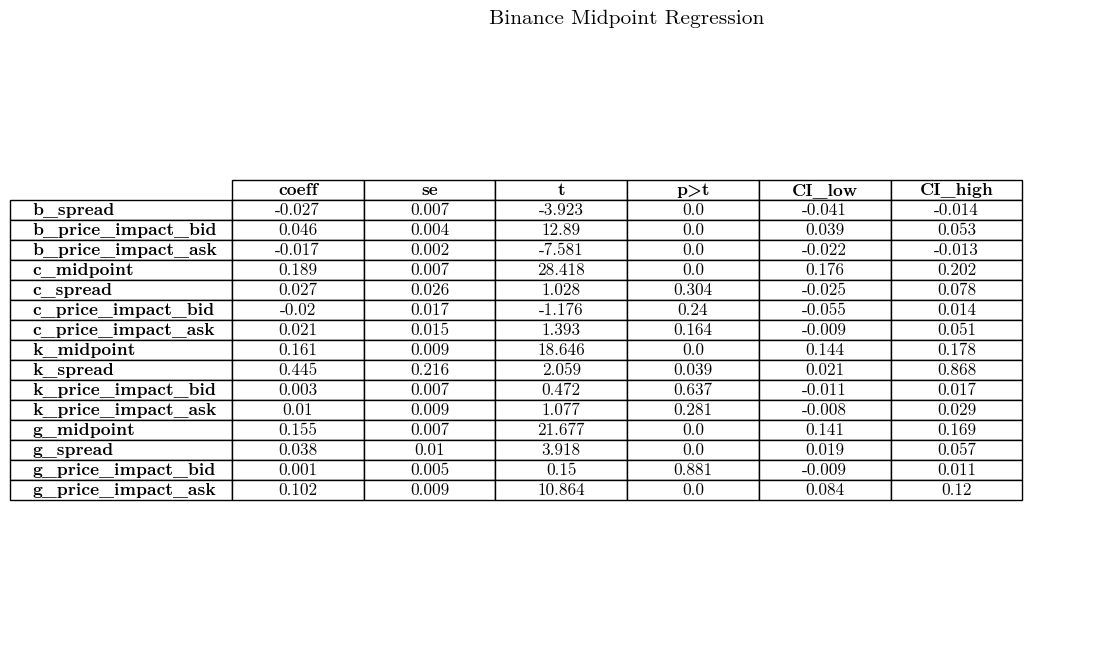

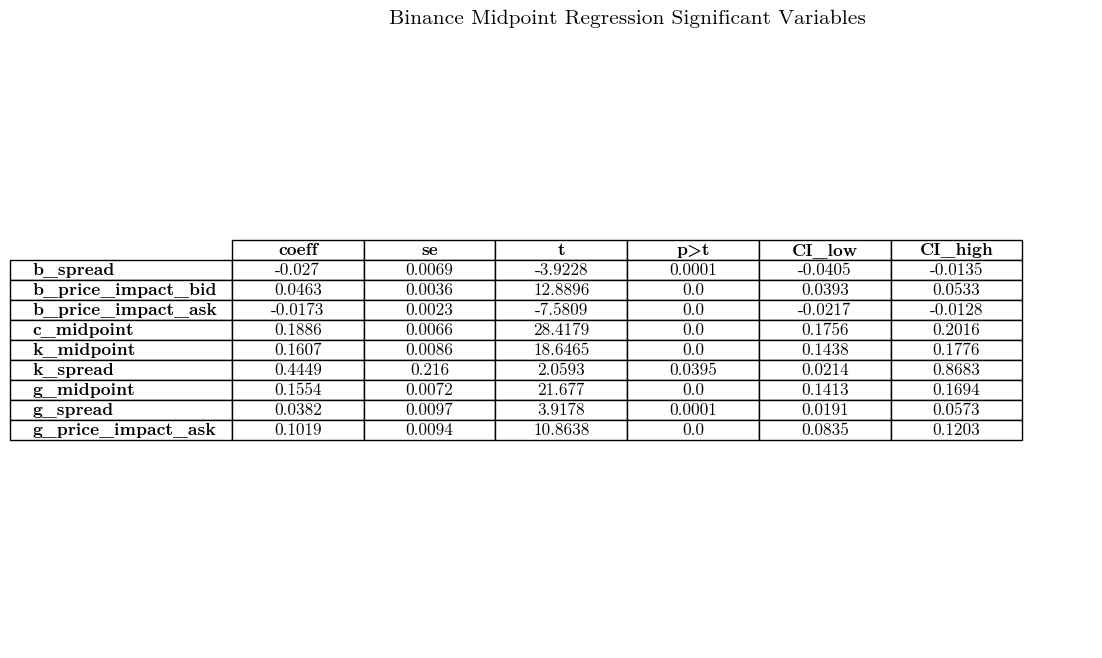

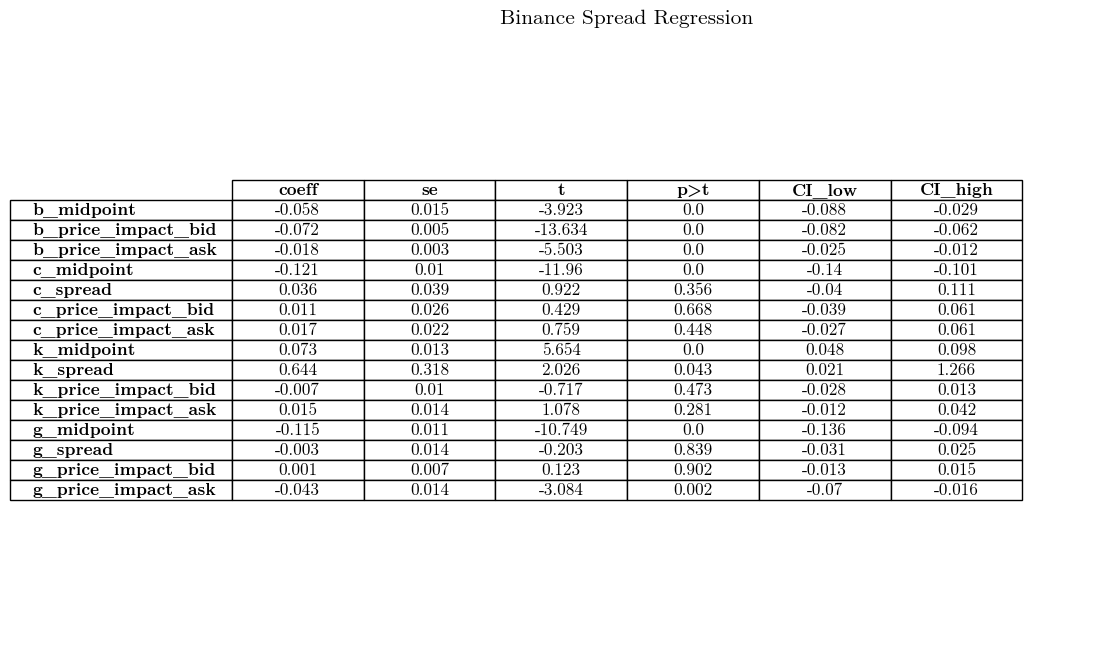

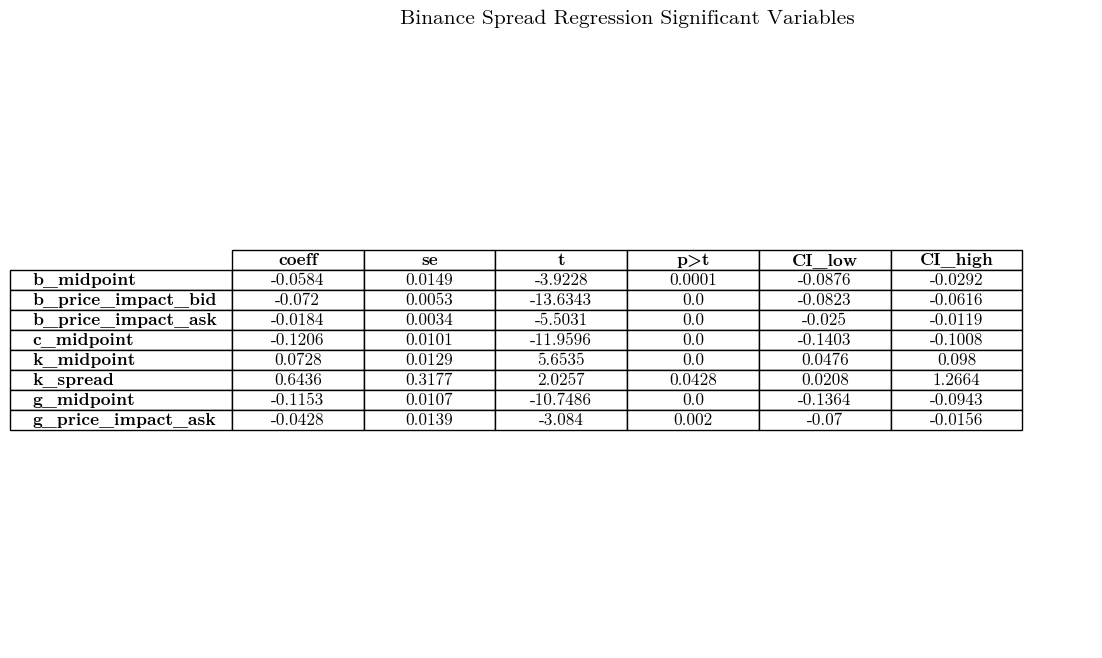

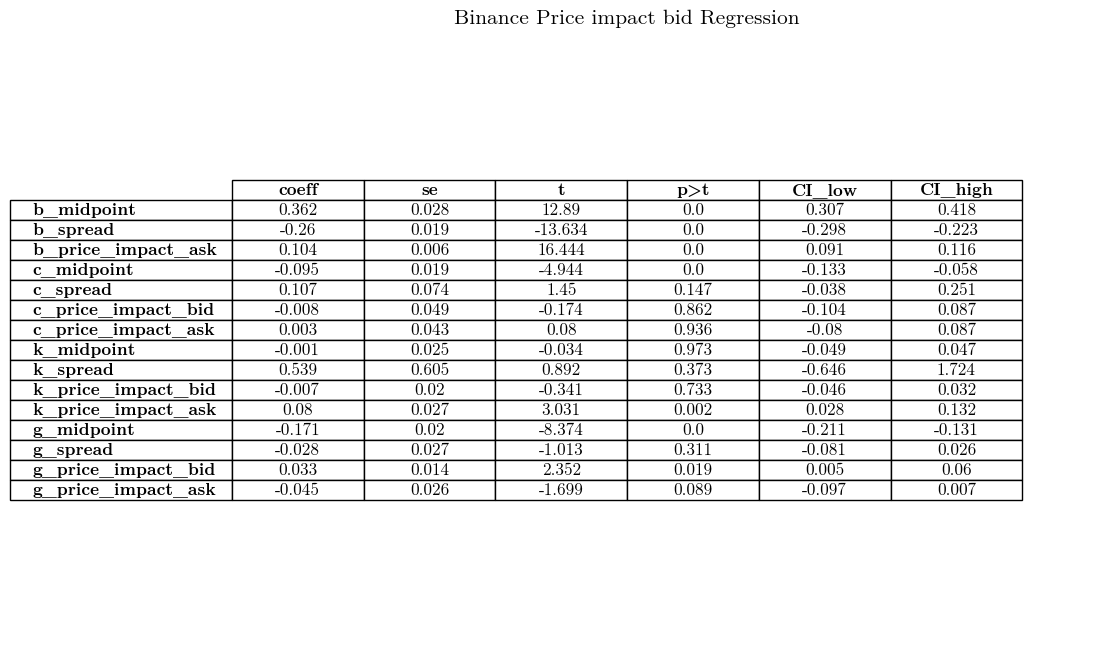

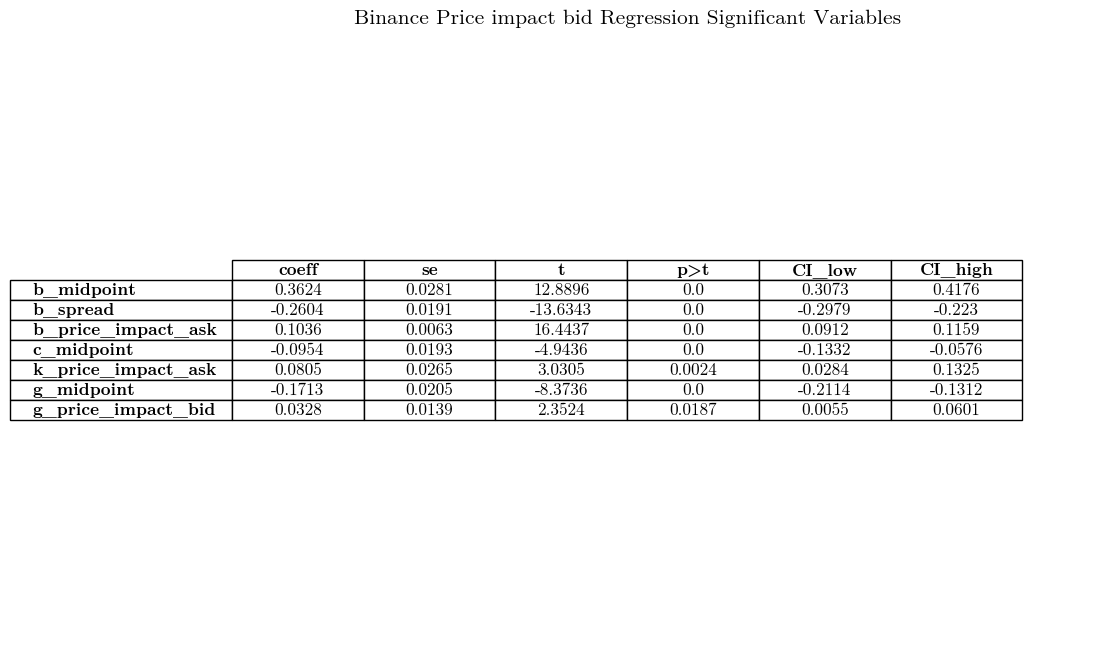

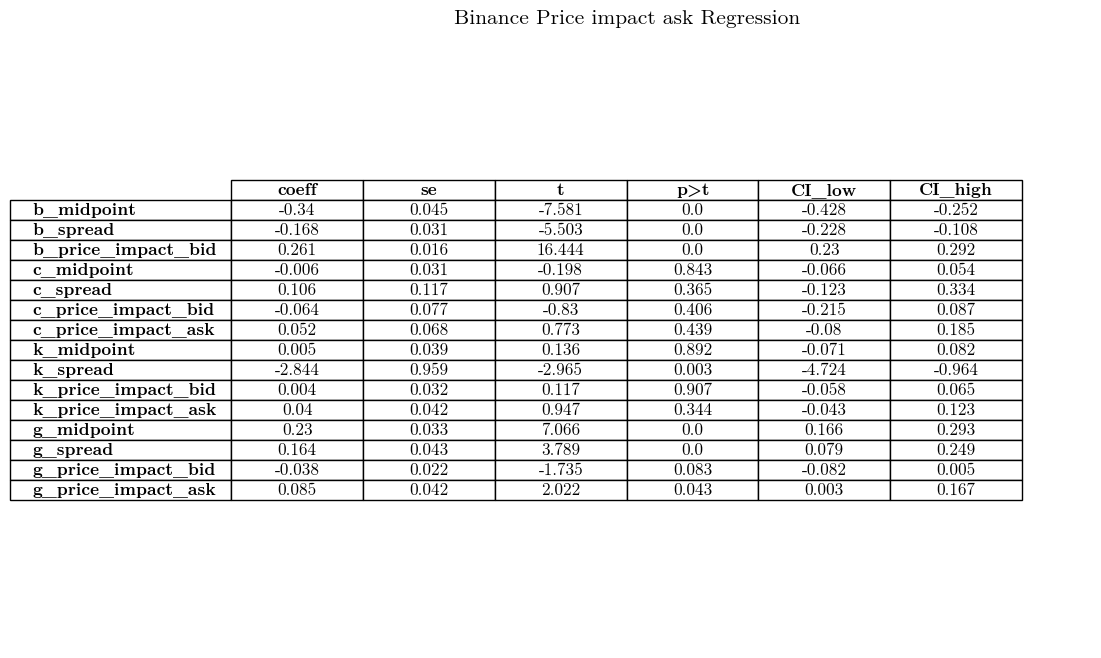

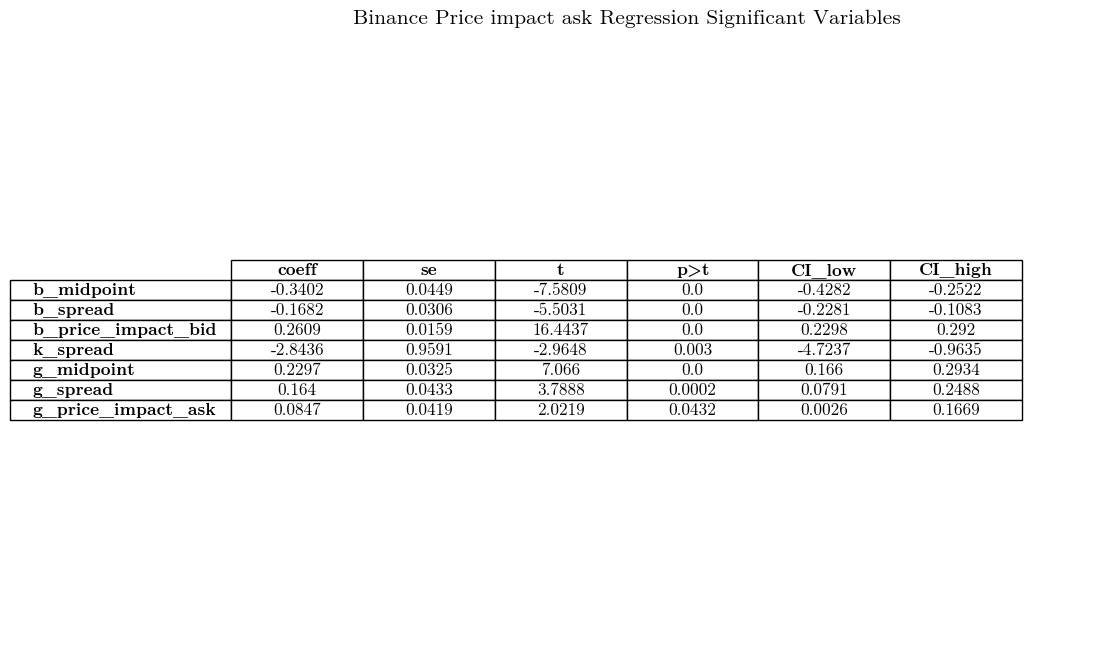

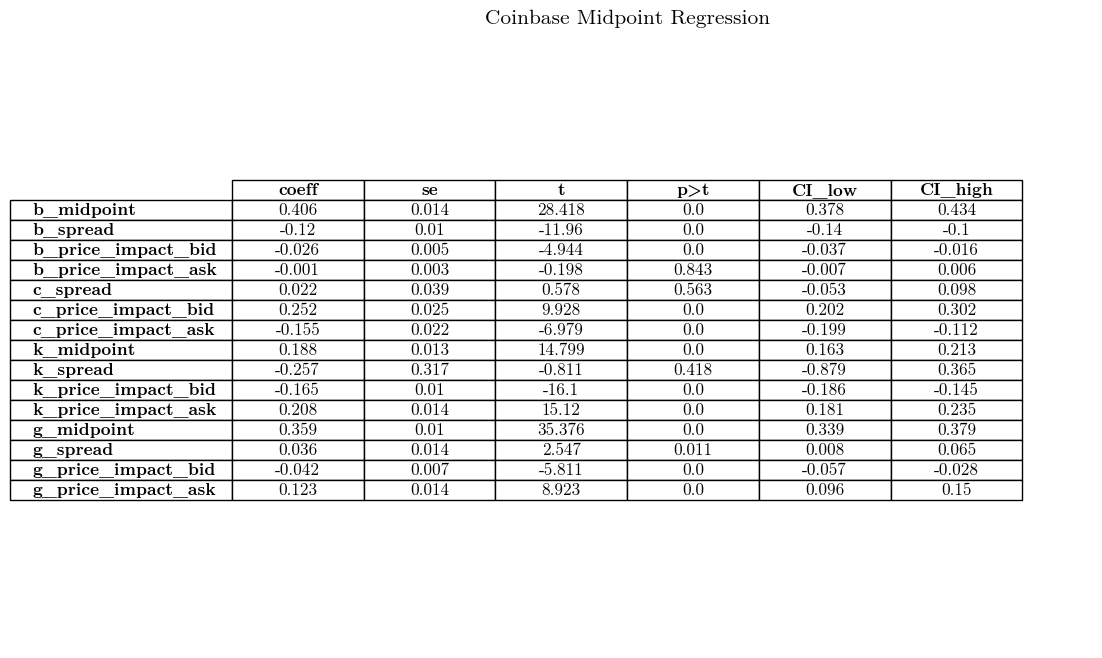

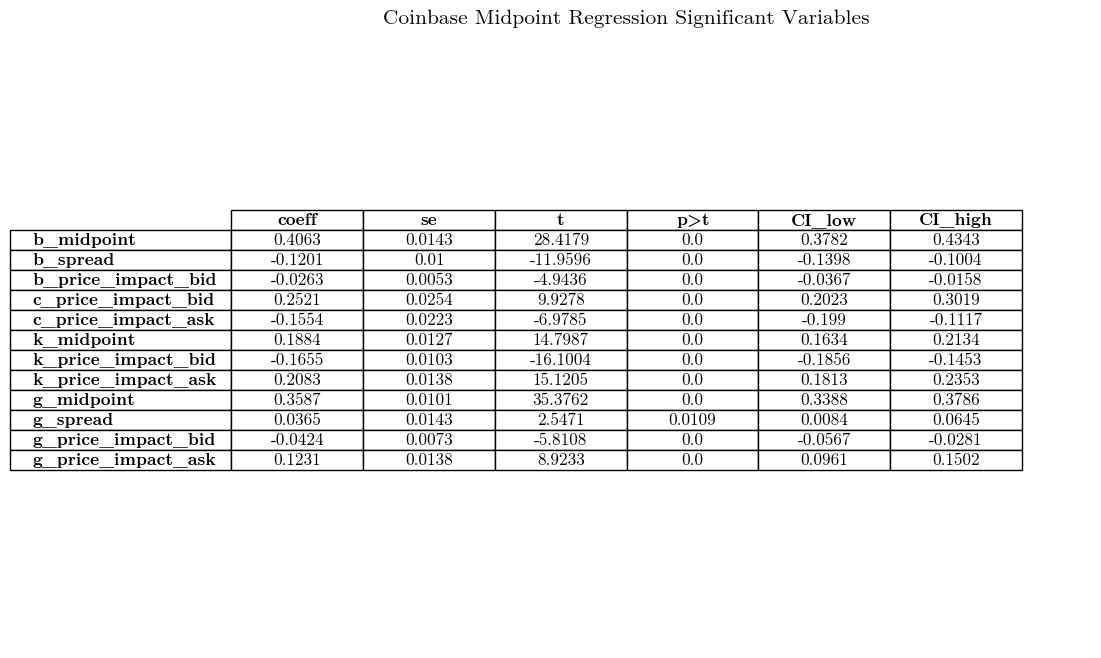

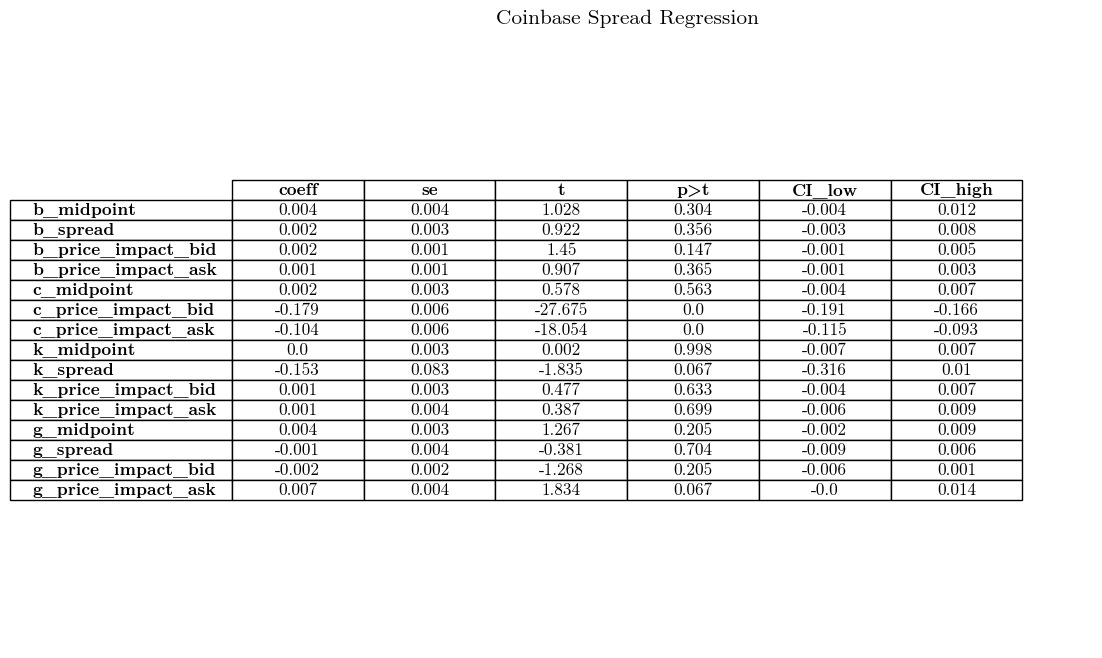

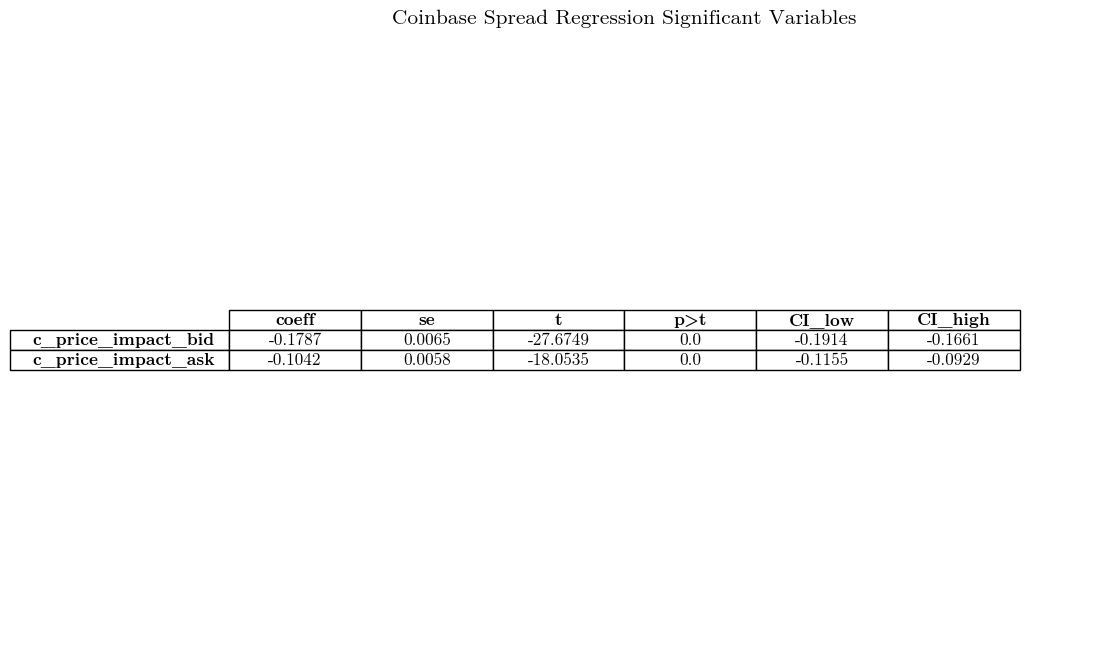

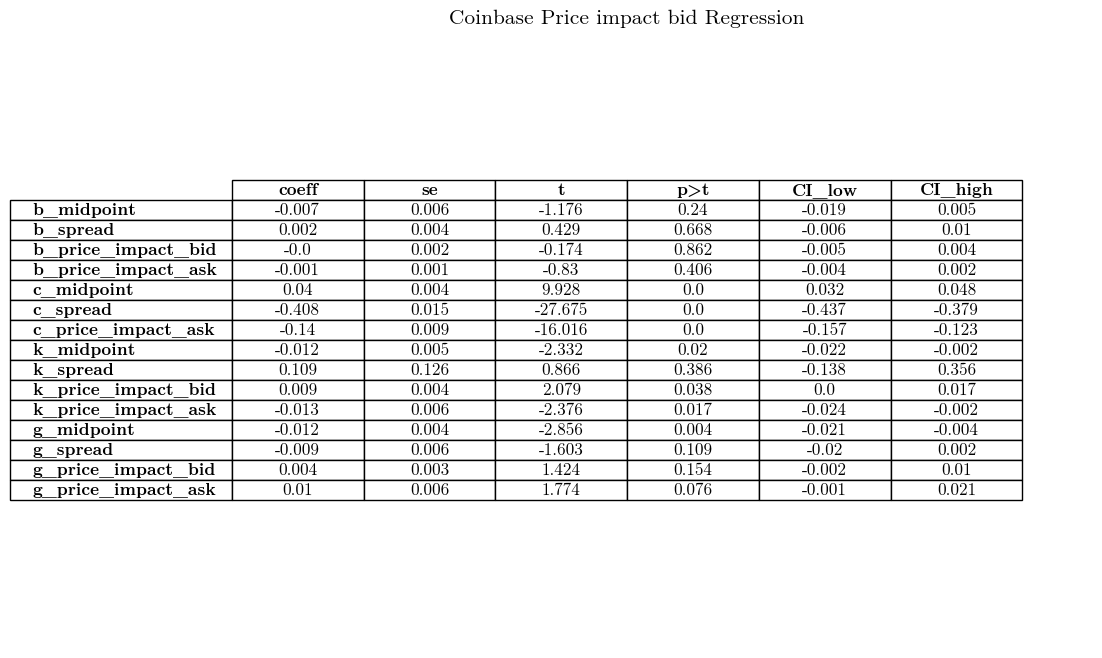

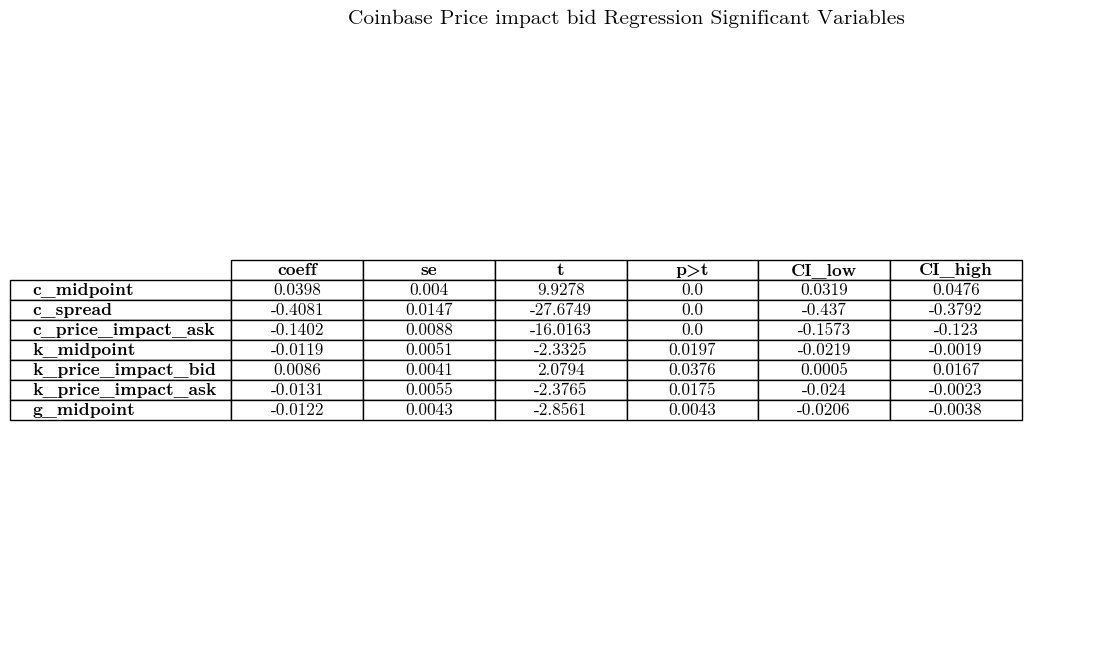

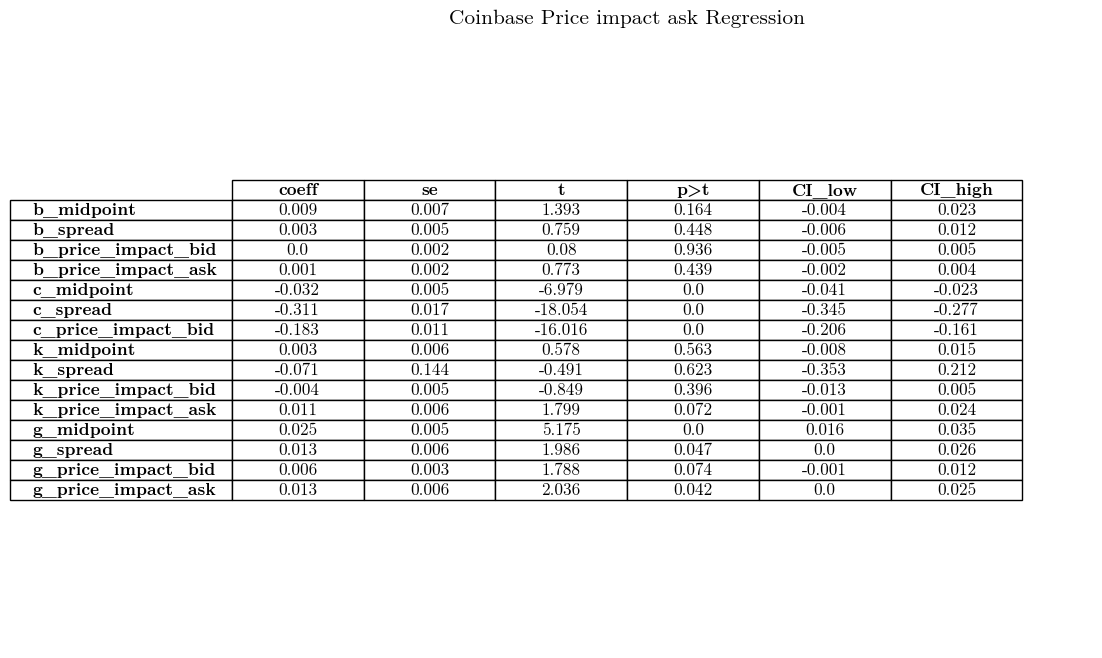

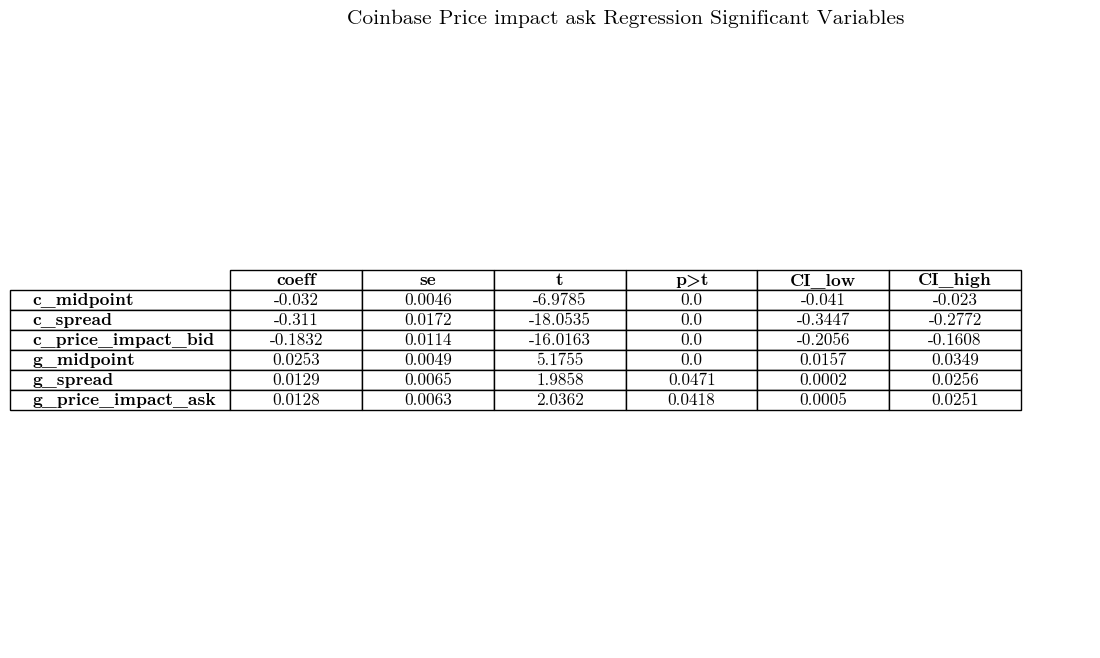

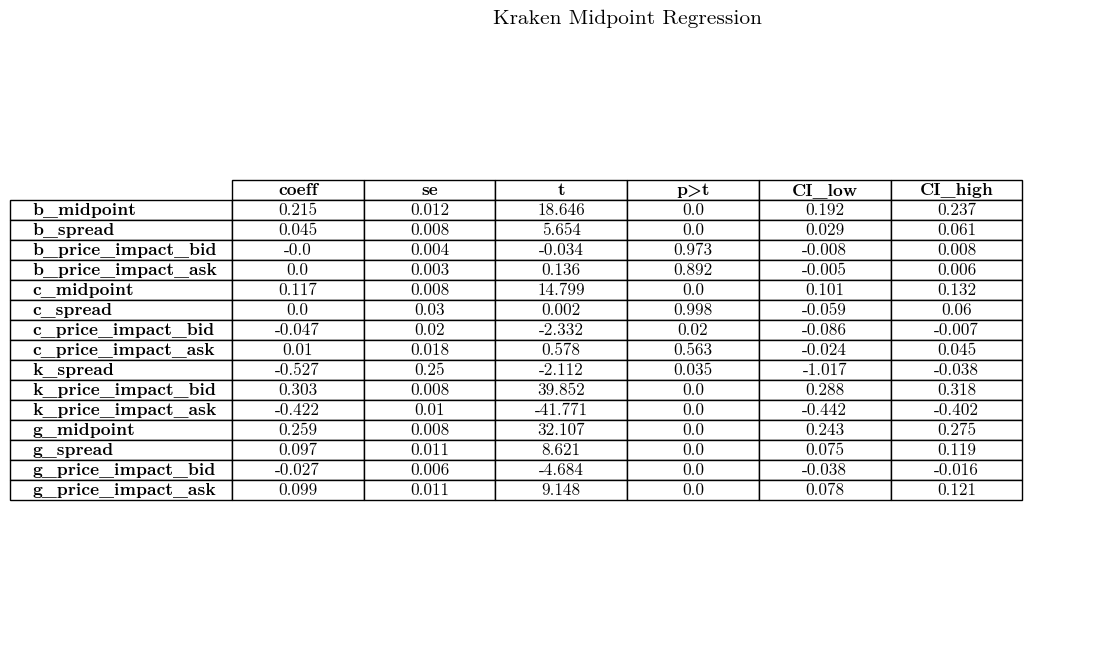

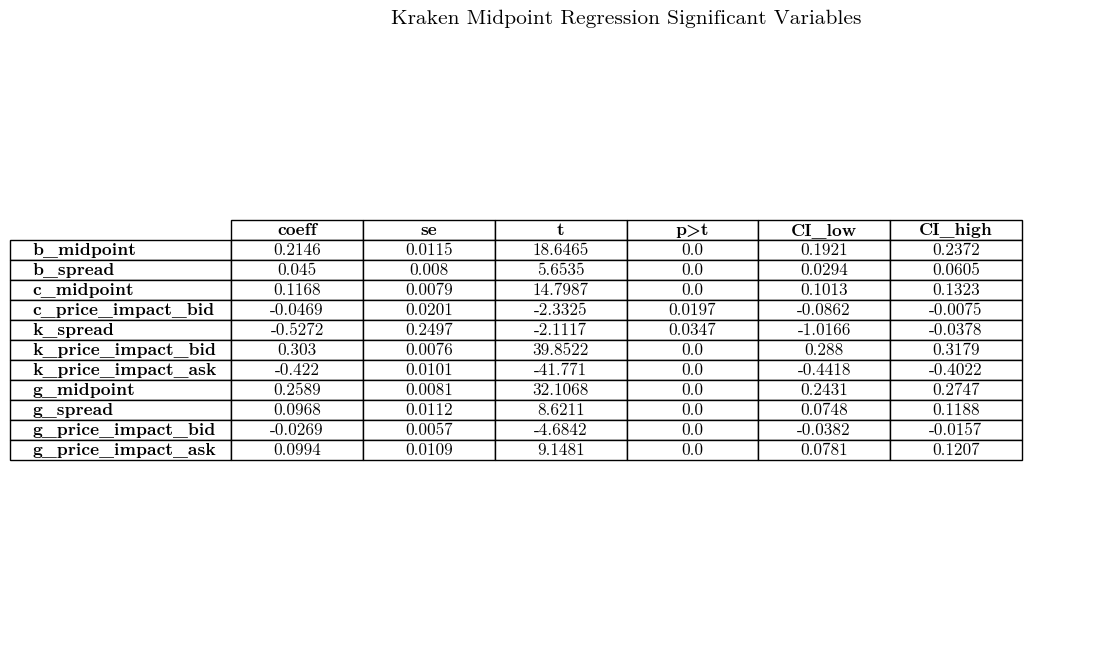

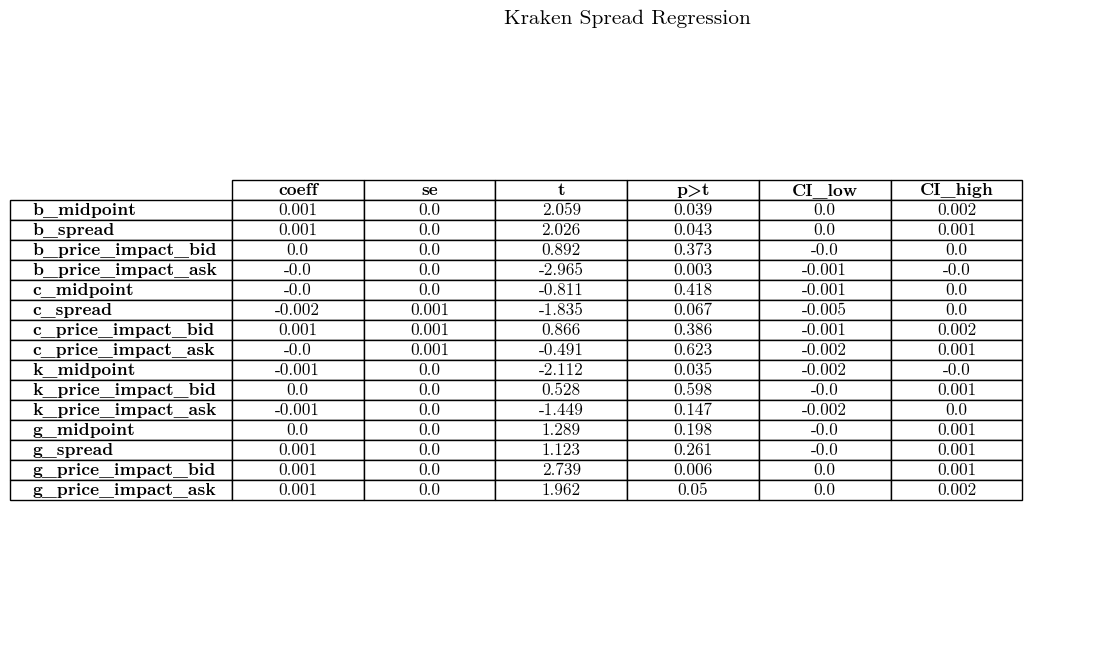

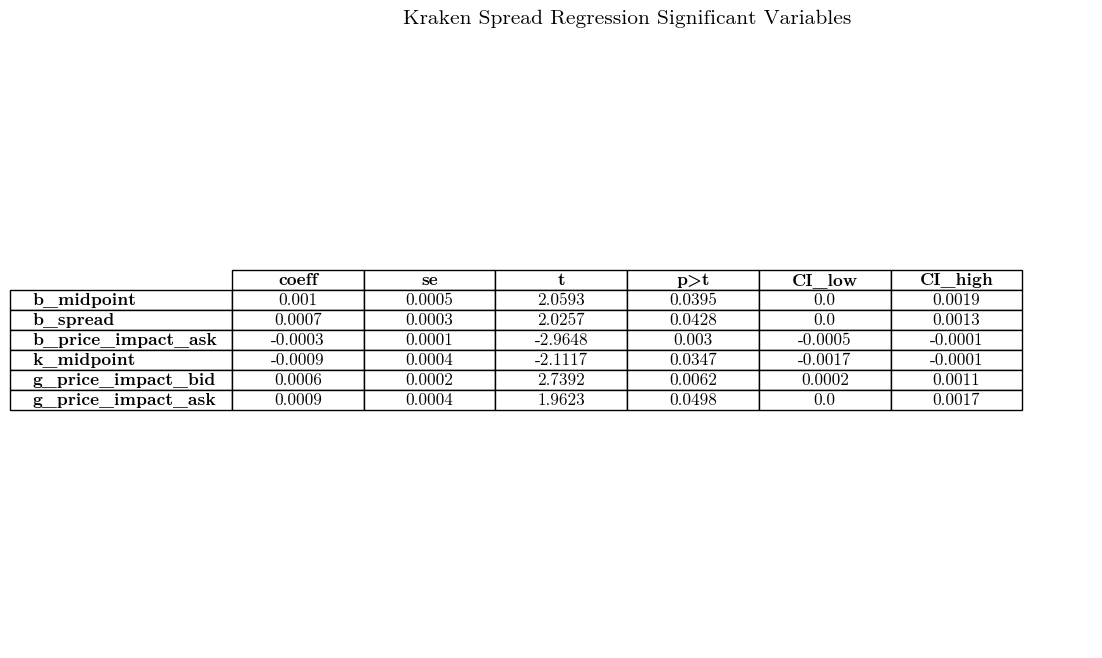

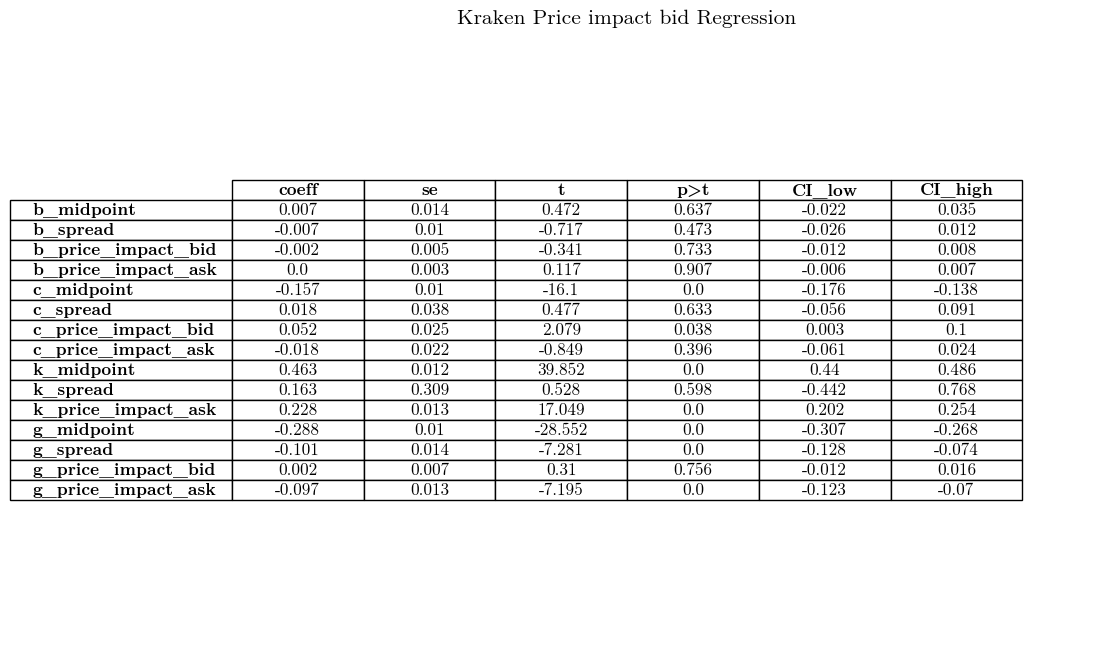

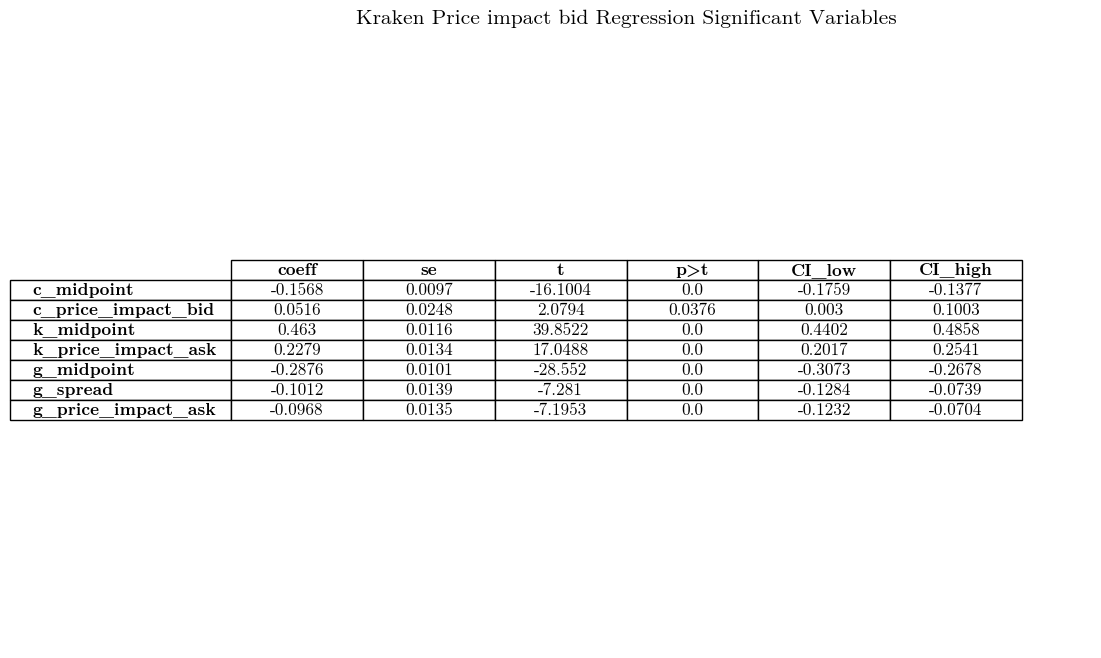

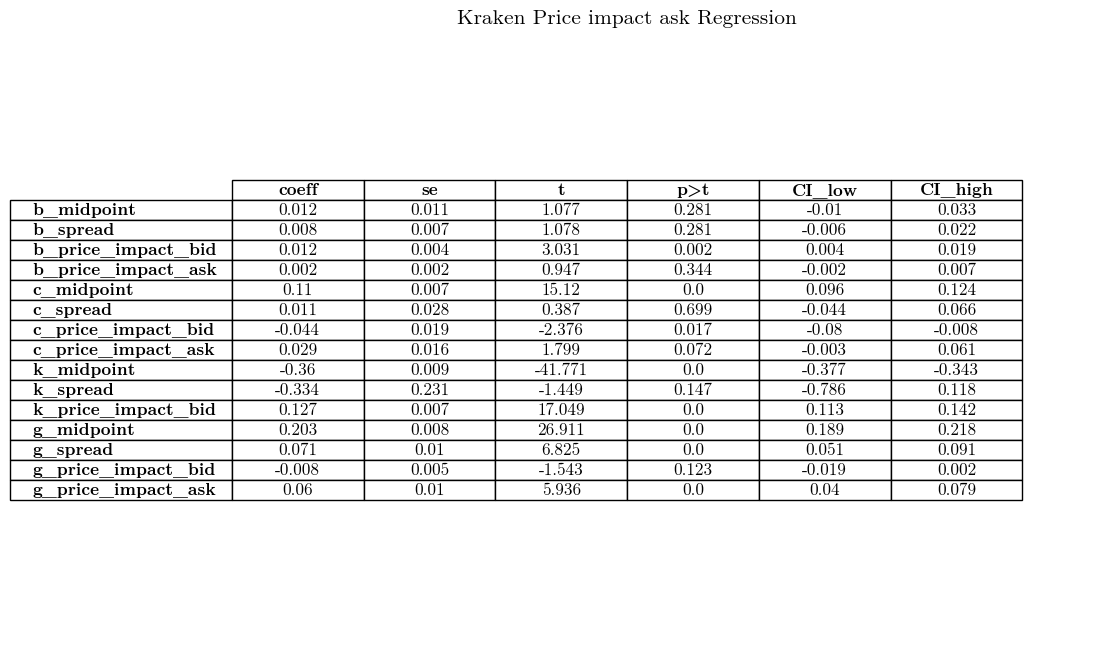

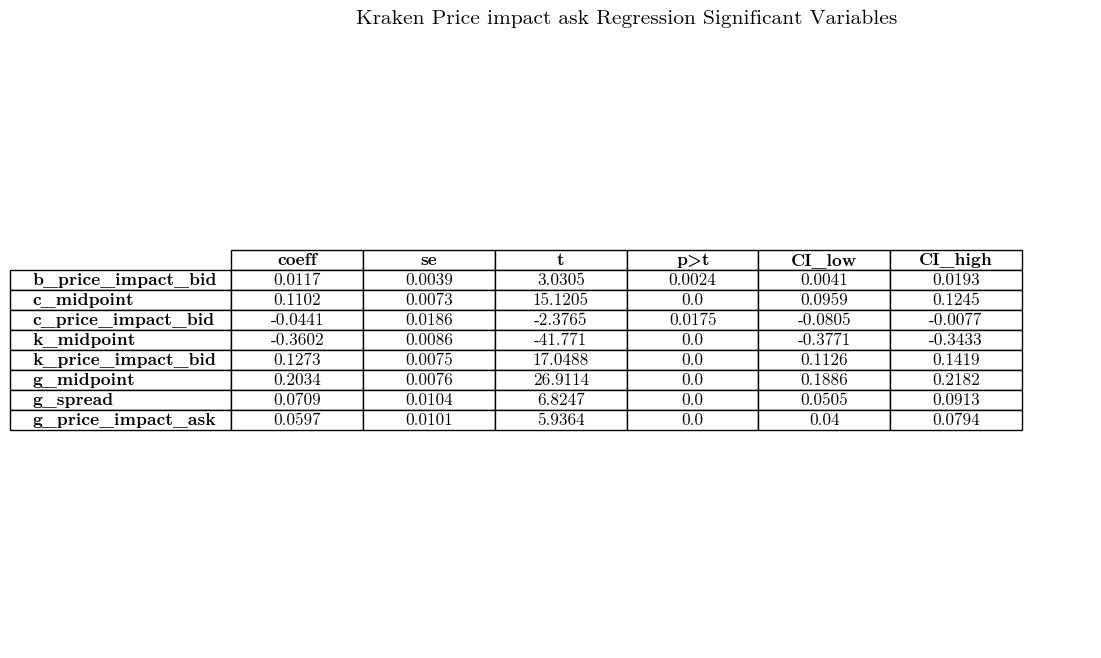

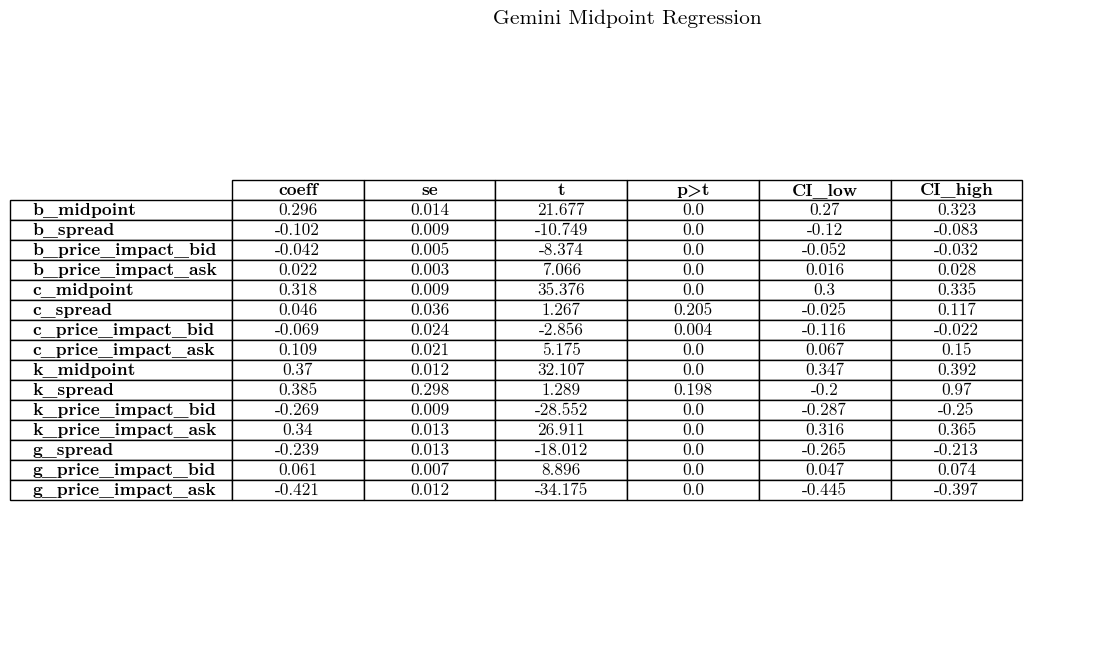

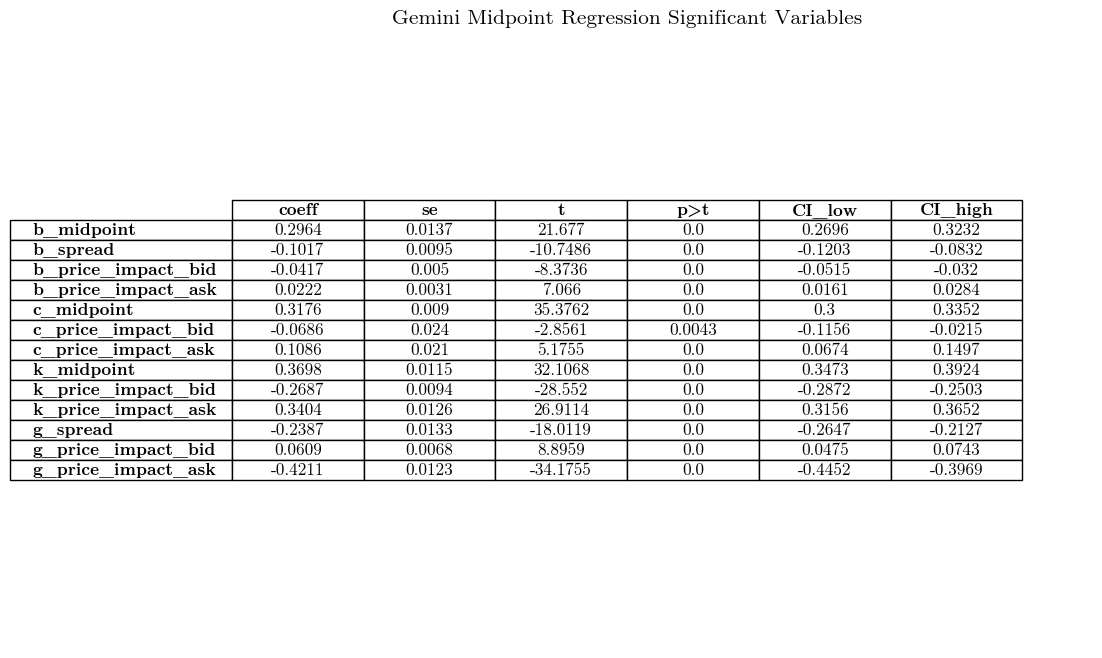

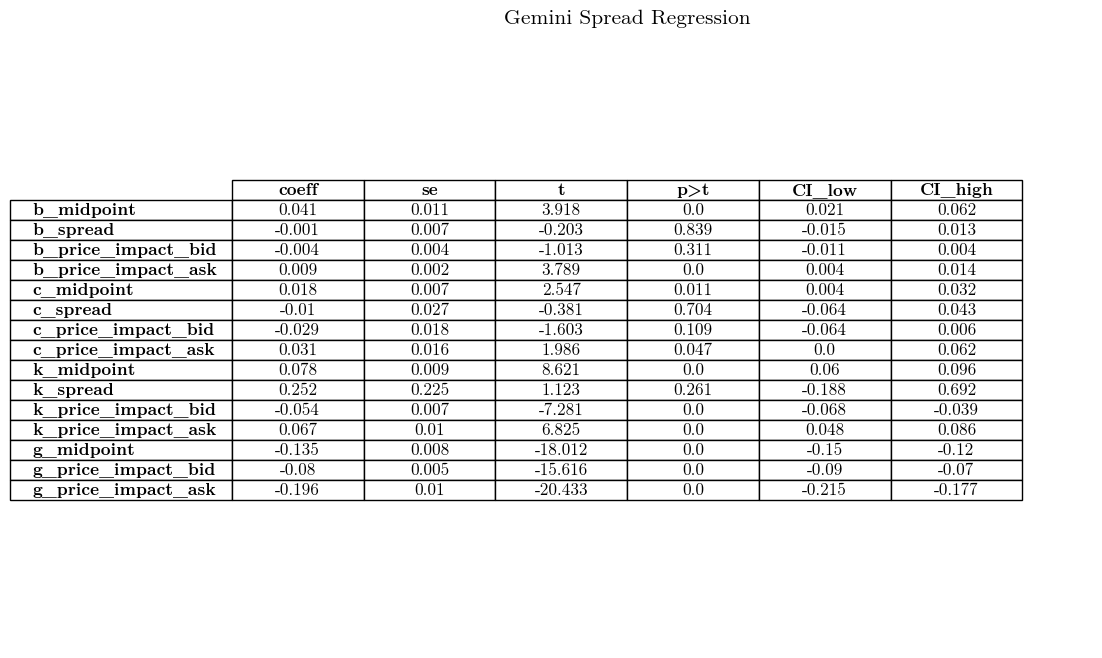

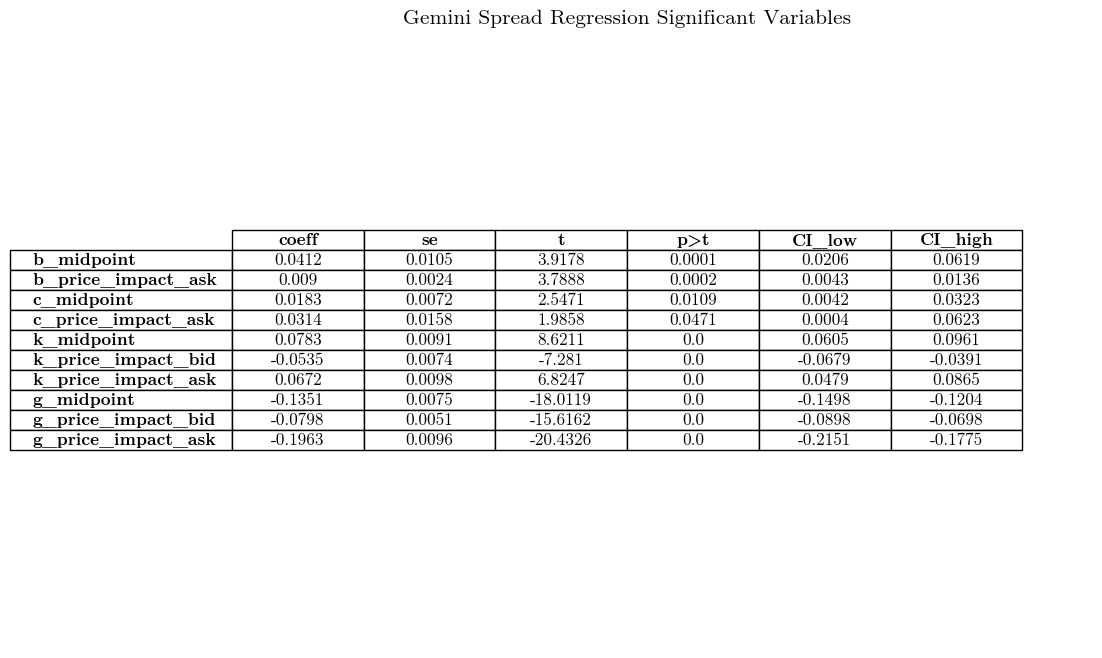

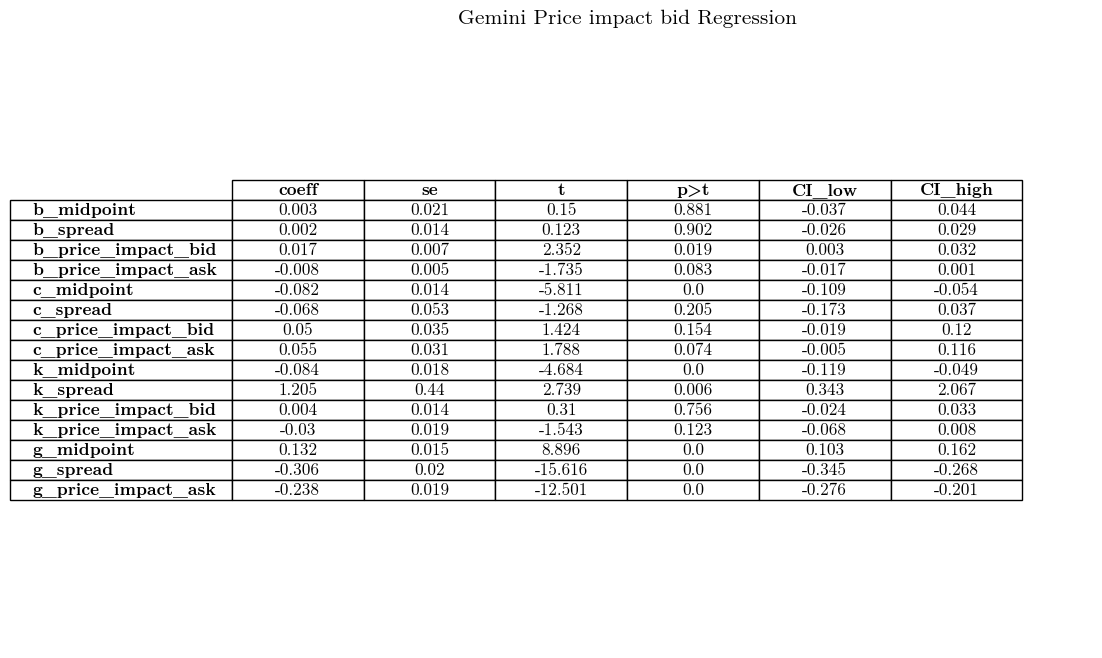

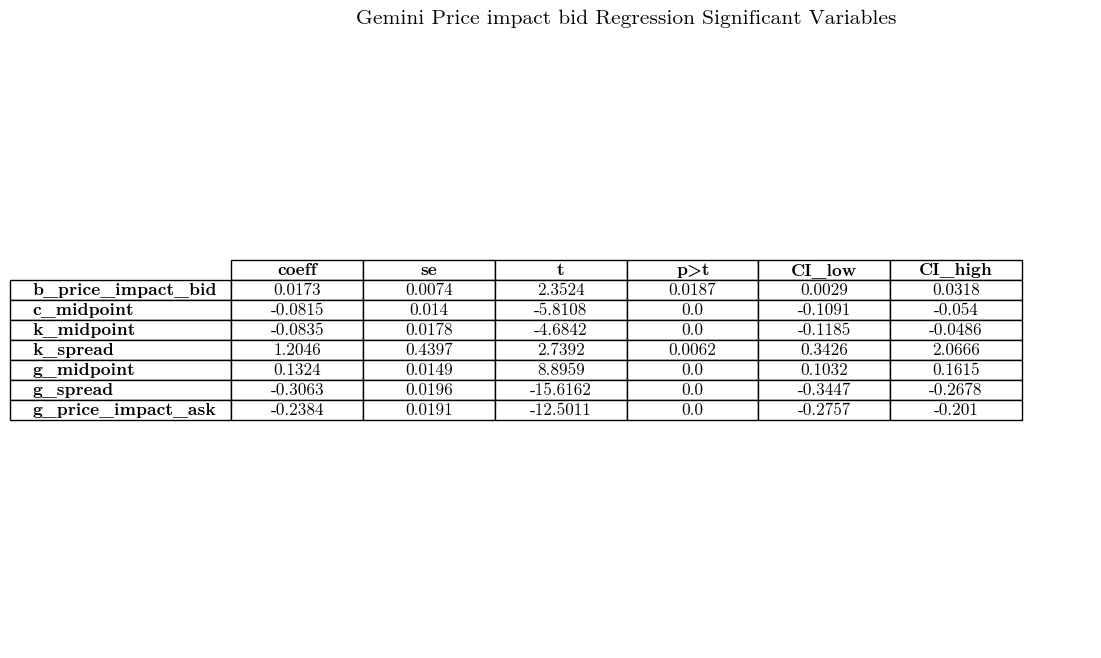

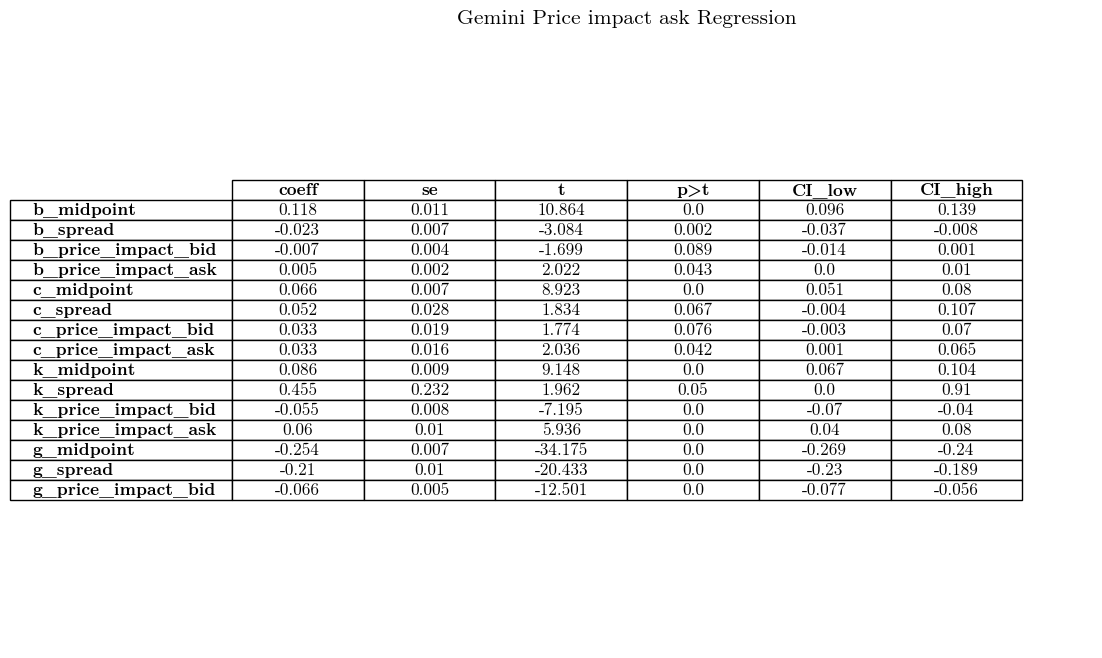

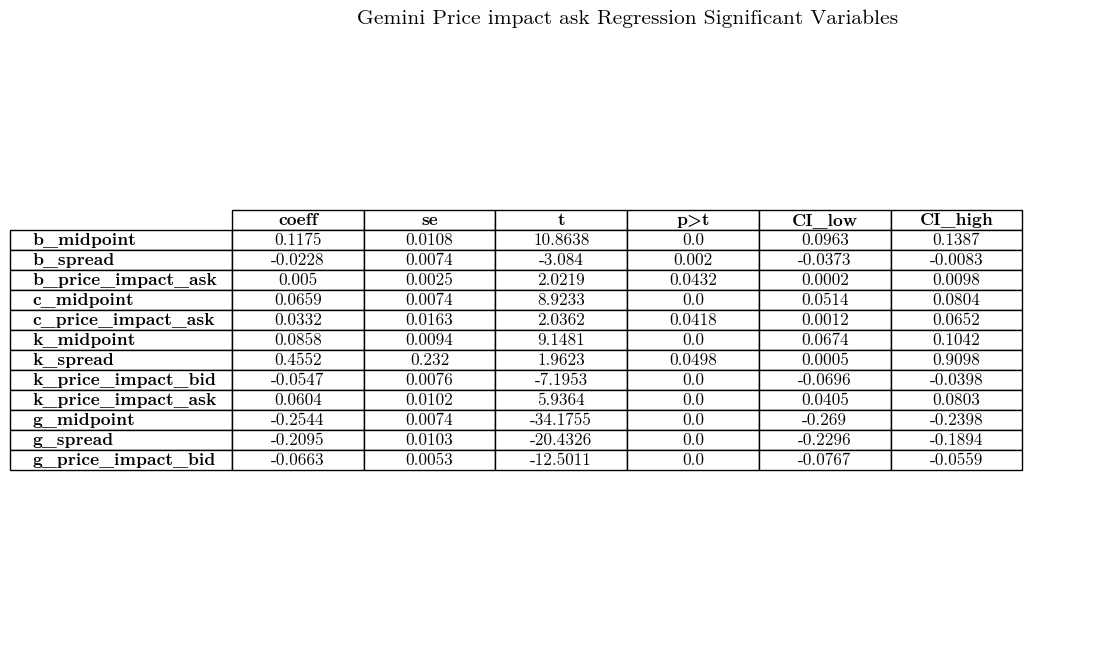

Overall Variable Impact:


{'b_spread': 15,
 'b_price_impact_bid': 15,
 'b_price_impact_ask': 15,
 'c_midpoint': 15,
 'c_spread': 15,
 'c_price_impact_bid': 15,
 'c_price_impact_ask': 15,
 'k_midpoint': 15,
 'k_spread': 15,
 'k_price_impact_bid': 15,
 'k_price_impact_ask': 15,
 'g_midpoint': 15,
 'g_spread': 15,
 'g_price_impact_bid': 15,
 'g_price_impact_ask': 15,
 'b_midpoint': 15}


Significant Variable Impact:


{'b_spread': 8,
 'b_price_impact_bid': 7,
 'b_price_impact_ask': 7,
 'c_midpoint': 12,
 'k_midpoint': 11,
 'k_spread': 6,
 'g_midpoint': 13,
 'g_spread': 10,
 'g_price_impact_ask': 12,
 'b_midpoint': 9,
 'k_price_impact_ask': 8,
 'g_price_impact_bid': 7,
 'c_price_impact_bid': 7,
 'c_price_impact_ask': 6,
 'k_price_impact_bid': 7,
 'c_spread': 2}

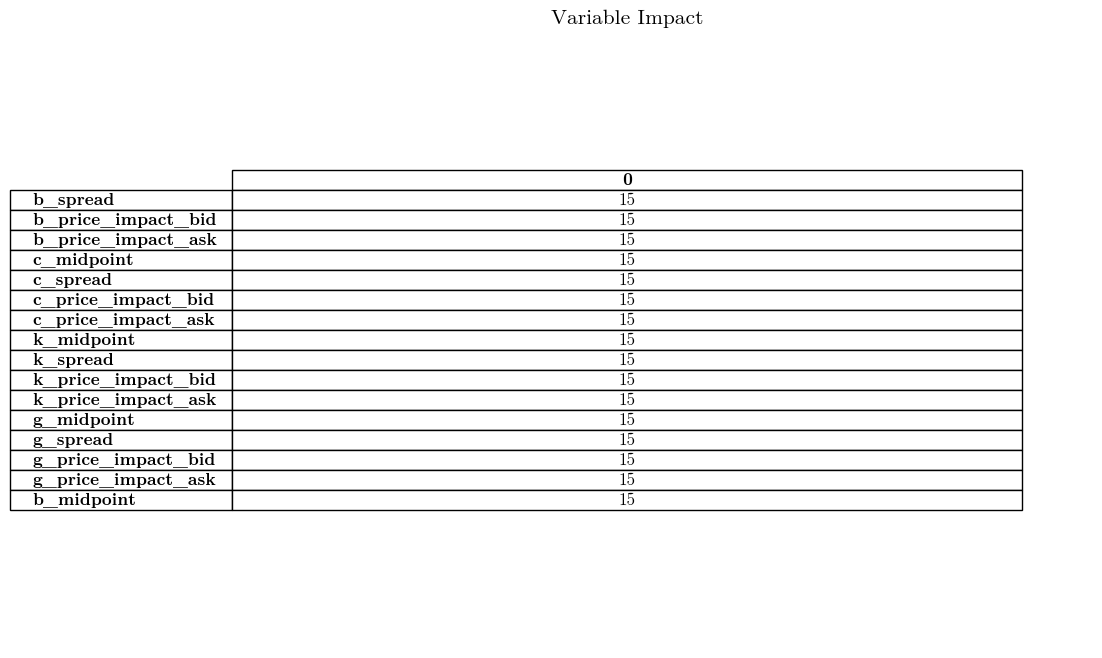

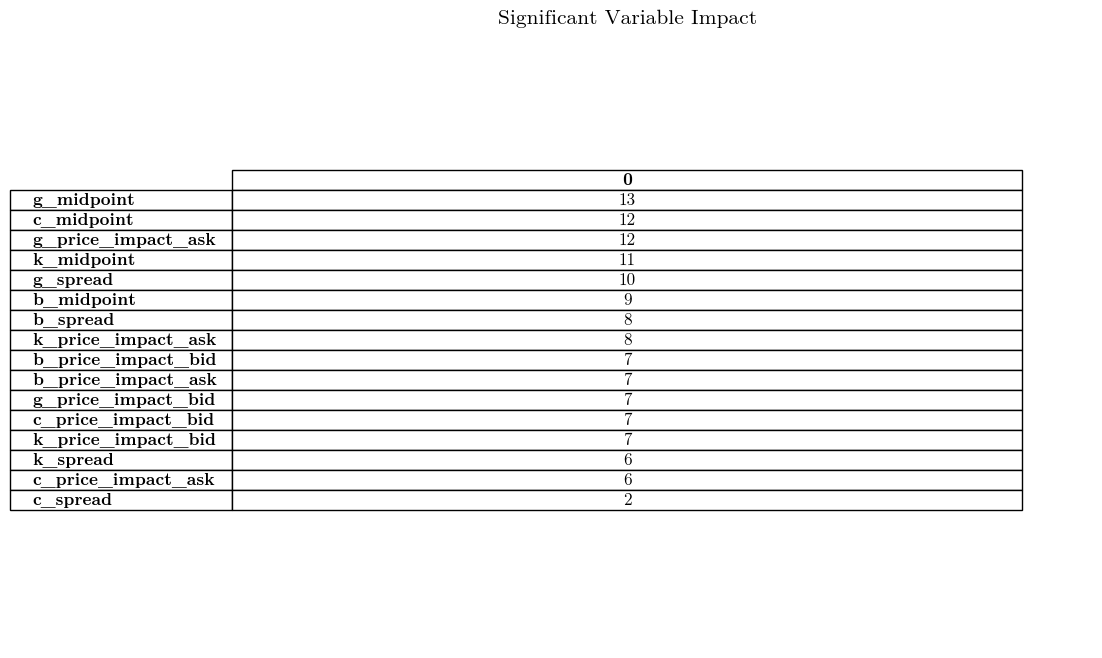

In [43]:
col_impact = {}
col_impact_sig = {}

for pre in ['b', 'c', 'k', 'g']:
    for col in ['_midpoint', '_spread', '_price_impact_bid', '_price_impact_ask']:
        value = pre + col
        y = all_ex_indexed_reg.copy()[value]
        X = all_ex_indexed_reg.copy().drop(columns=[value]).shift(1)
        result = reg(all_ex_indexed_reg, pd.DataFrame(y).columns, X.columns)
        result_summary = result.summary
        significant_vars = result_summary[result_summary['p>t'] < 0.05]
        sig_df = result_summary.T[significant_vars.index].T
        exchange_dict = {'b': 'Binance', 'c': 'Coinbase', 'k': 'Kraken', 'g': 'Gemini'}
        exchange = exchange_dict[pre]
        title = exchange + " " + col[1:].replace('_', " ").capitalize() + " Regression"
        display_save_regressions(result_summary, title, rounding=3)
        
        # Count occurrences of each variable in result_summary
        for variable in result_summary.index:
            if variable in col_impact:
                col_impact[variable] += 1
            else:
                col_impact[variable] = 1

        if len(sig_df) > 0:
            display_save_regressions(sig_df, title + " Significant Variables", rounding=4)
            # Count occurrences of significant variables in sig_df
            for variable in sig_df.index:
                if variable in col_impact_sig:
                    col_impact_sig[variable] += 1
                else:
                    col_impact_sig[variable] = 1

# Display the col_impact and col_impact_sig dictionaries
print("Overall Variable Impact:")
display(col_impact)
print("\nSignificant Variable Impact:")
display(col_impact_sig)

impact_df = pd.DataFrame(col_impact, index=[0]).T
sig_impact_df = pd.DataFrame(col_impact_sig, index=[0]).T.sort_values(by=0, ascending=False)
save_tables(impact_df, 'Variable Impact', save_directory='./figures/regression_tables/')
save_tables(sig_impact_df, 'Significant Variable Impact', save_directory='./figures/regression_tables/')

#Change in everything
# fix the p-value
# biggest overlap time start and end date